In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3

import matplotlib as mpl

from datetime import datetime
import subprocess


In [2]:
#has_gpu = False

has_gpu = True

training_name = 'version1a'




#--- Hyperparameter settings.

#max_events =   120000
#max_events =   600000
max_events =  1000000
#max_events =  3000000
#max_events = 15000000
#max_events = 1e9



learning_rate_setval_reg = 1e-5  
batch_size_setval = 1024
max_epochs = 5000
dropout_setval = 0.0
amsgrad_setval = False
patience_setval = 40
#huber_delta = 0.01
huber_delta = 1





#input_file_rapgap = '/data/owen/DIS-reco/h1-2021-10-14-v5a/all-h1-rapgap.root'
#input_file_django = '/data/owen/DIS-reco/h1-2021-10-14-v5a/all-h1-django.root'

#input_file_rapgap = '/data/owen/DIS-reco/h1-2023-06-23-v6c/test-rapgap.root'
#input_file_django = '/data/owen/DIS-reco/h1-2023-06-23-v6c/test-django.root'

input_file_rapgap = '/data/owen/DIS-reco/h1-2023-06-23-v6c/all-h1-rapgap.root'
input_file_django = '/data/owen/DIS-reco/h1-2023-06-23-v6c/all-h1-django.root'


parfile = open( '%s-setup.txt' % training_name,'w')

parfile.write('%s\n' % datetime.now() )
parfile.write('training_name : %s\n' % training_name )
parfile.write('input_file_rapgap : %s\n' % input_file_rapgap )
parfile.write('input_file_django : %s\n' % input_file_django )
parfile.write('max_events : %d\n' % max_events )
parfile.write('learning_rate_setval_reg : %g\n' % learning_rate_setval_reg )
parfile.write('batch_size_setval : %d\n' % batch_size_setval )
parfile.write('max_epochs : %d\n' % max_epochs )
parfile.write('dropout_setval : %g\n' % dropout_setval )
parfile.write('amsgrad_setval : %g\n' % amsgrad_setval )
parfile.write('patience_setval : %g\n' % patience_setval )
parfile.write('huber_delta : %g\n' % huber_delta )




parfile.close()

print('\n\n--- Training parameters file: %s-setup.txt\n' % training_name )
print( subprocess.getoutput('cat %s-setup.txt' % training_name ) )
print('\n\n')



--- Training parameters file: version1a-setup.txt

2023-06-28 10:22:36.480092
training_name : version1a
input_file_rapgap : /data/owen/DIS-reco/h1-2023-06-23-v6c/all-h1-rapgap.root
input_file_django : /data/owen/DIS-reco/h1-2023-06-23-v6c/all-h1-django.root
max_events : 1000000
learning_rate_setval_reg : 1e-05
batch_size_setval : 1024
max_epochs : 5000
dropout_setval : 0
amsgrad_setval : 0
patience_setval : 40
huber_delta : 1





In [3]:
%%time


ur_file_rapgap = uproot3.open(input_file_rapgap)

print (ur_file_rapgap.keys()) 
ur_tree_rapgap = ur_file_rapgap['Rapgap/minitree']
print(ur_tree_rapgap)
ur_tree_rapgap.show()


#pandas_df   =  ur_tree.pandas.df(['*'], entrystop=max_events,flatten=True)

pandas_df_rapgap   =  ur_tree_rapgap.pandas.df(
    ['has_isr','has_fsr',
     'tower_sum_40','n_towers_40', 
     'eta_pho_closest_to_ebeam','e_pho_closest_to_ebeam', 'phi_pho_closest_to_ebeam',
     'obs_x', 'obs_y', 'obs_Q2',
     'from_tlv_gen_Q2','from_tlv_gen_x','from_tlv_gen_y',
     'obs_e_e','obs_e_pz','obs_e_pt','obs_e_phi',
     'obs_hfs_e','obs_hfs_pz','obs_hfs_pt','obs_hfs_phi',
     'obs_dphi',
     'Empz', 'obs_e_trk_e',
     'beam_e_e', 'wgt',
     'gen_e_e', 'gen_e_pz', 'gen_e_pt', 'gen_e_eta', 'gen_e_phi',
     'obs_e_eta',
     'gen_hfs_e', 'gen_hfs_pz', 'gen_hfs_pt', 'gen_hfs_eta',
     'gen_hfs_etacut_e','gen_hfs_etacut_pz','gen_hfs_etacut_pt','gen_hfs_etacut_eta', 'gen_hfs_etacut_phi',
     'obs_hfs_eta',
    ],
    entrystop=max_events,flatten=True)

print('\n\n Number of entries in pandas_df:  %d ' % pandas_df_rapgap.shape[0] )

[b'Rapgap;1']
<TTree b'minitree' at 0x7f8628dc6080>
wgt                        (no streamer)              asdtype('>f4')
Empz                       (no streamer)              asdtype('>f4')
from_tlv_gen_Q2            (no streamer)              asdtype('>f4')
from_tlv_gen_x             (no streamer)              asdtype('>f4')
from_tlv_gen_y             (no streamer)              asdtype('>f4')
beam_e_e                   (no streamer)              asdtype('>f4')
beam_p_e                   (no streamer)              asdtype('>f4')
has_isr                    (no streamer)              asdtype('int8')
has_fsr                    (no streamer)              asdtype('int8')
gen_e_e                    (no streamer)              asdtype('>f4')
gen_e_pz                   (no streamer)              asdtype('>f4')
gen_e_pt                   (no streamer)              asdtype('>f4')
gen_e_phi                  (no streamer)              asdtype('>f4')
gen_e_eta                  (no streamer)         

In [4]:
%%time


ur_file_django = uproot3.open(input_file_django)

print (ur_file_django.keys()) 
ur_tree_django = ur_file_django['Django/minitree']
print(ur_tree_django)
ur_tree_django.show()


#pandas_df   =  ur_tree.pandas.df(['*'], entrystop=max_events,flatten=True)

pandas_df_django   =  ur_tree_django.pandas.df(
    ['has_isr','has_fsr',
     'tower_sum_40','n_towers_40', 
     'eta_pho_closest_to_ebeam','e_pho_closest_to_ebeam', 'phi_pho_closest_to_ebeam',
     'obs_x', 'obs_y', 'obs_Q2',
     'from_tlv_gen_Q2','from_tlv_gen_x','from_tlv_gen_y',
     'obs_e_e','obs_e_pz','obs_e_pt','obs_e_phi',
     'obs_hfs_e','obs_hfs_pz','obs_hfs_pt','obs_hfs_phi',
     'obs_dphi',
     'Empz', 'obs_e_trk_e',
     'beam_e_e', 'wgt',
     'gen_e_e', 'gen_e_pz', 'gen_e_pt', 'gen_e_eta', 'gen_e_phi',
     'obs_e_eta',
     'gen_hfs_e', 'gen_hfs_pz', 'gen_hfs_pt', 'gen_hfs_eta',
     'gen_hfs_etacut_e','gen_hfs_etacut_pz','gen_hfs_etacut_pt','gen_hfs_etacut_eta', 'gen_hfs_etacut_phi',
     'obs_hfs_eta',
    ],
    entrystop=max_events,flatten=True)

print('\n\n Number of entries in pandas_df:  %d ' % pandas_df_django.shape[0] )

[b'Django;1']
<TTree b'minitree' at 0x7f8462540cd0>
wgt                        (no streamer)              asdtype('>f4')
Empz                       (no streamer)              asdtype('>f4')
from_tlv_gen_Q2            (no streamer)              asdtype('>f4')
from_tlv_gen_x             (no streamer)              asdtype('>f4')
from_tlv_gen_y             (no streamer)              asdtype('>f4')
beam_e_e                   (no streamer)              asdtype('>f4')
beam_p_e                   (no streamer)              asdtype('>f4')
has_isr                    (no streamer)              asdtype('int8')
has_fsr                    (no streamer)              asdtype('int8')
gen_e_e                    (no streamer)              asdtype('>f4')
gen_e_pz                   (no streamer)              asdtype('>f4')
gen_e_pt                   (no streamer)              asdtype('>f4')
gen_e_phi                  (no streamer)              asdtype('>f4')
gen_e_eta                  (no streamer)         

In [5]:
pandas_df_rapgap.eval( 'obs_hfs_Empz = obs_hfs_e - obs_hfs_pz', inplace=True )
pandas_df_rapgap.eval( 'obs_e_Empz = obs_e_e - obs_e_pz', inplace=True )

pandas_df_rapgap.eval( 'obs_event_Empz = obs_hfs_Empz + obs_e_Empz', inplace=True )

pandas_df_rapgap.eval( 'rot_pt1 = 0.70710678 * obs_hfs_pt - 0.70710678 * obs_e_pt', inplace=True )
pandas_df_rapgap.eval( 'rot_pt2 = 0.70710678 * obs_hfs_pt + 0.70710678 * obs_e_pt', inplace=True )

pandas_df_rapgap.eval( 'rot_Empz1 = 0.70710678 * obs_hfs_Empz - 0.70710678 * obs_e_Empz', inplace=True )
pandas_df_rapgap.eval( 'rot_Empz2 = 0.70710678 * obs_hfs_Empz + 0.70710678 * obs_e_Empz', inplace=True )

pandas_df_rapgap.eval( 'gen_log_x = log(from_tlv_gen_x)', inplace=True )
pandas_df_rapgap.eval( 'gen_log_y = log(from_tlv_gen_y)', inplace=True )
pandas_df_rapgap.eval( 'gen_log_Q2 = log(from_tlv_gen_Q2)', inplace=True )

pandas_df_rapgap.eval( 'e_ecal_over_trk_ratio = tower_sum_40/obs_e_trk_e', inplace=True )
pandas_df_rapgap.eval( 'e_ecal_over_trk_ratio = (e_ecal_over_trk_ratio<4)*e_ecal_over_trk_ratio + (e_ecal_over_trk_ratio>4)*4', inplace=True )

pandas_df_rapgap.eval( 'dphi_pho_closest_to_ebeam = obs_e_phi - phi_pho_closest_to_ebeam', inplace=True )
pandas_df_rapgap.eval( 'dphi_pho_closest_to_ebeam = (abs(dphi_pho_closest_to_ebeam)<3.14159265)*(dphi_pho_closest_to_ebeam)+(dphi_pho_closest_to_ebeam>3.14159265)*(dphi_pho_closest_to_ebeam-2*3.14159265) + (dphi_pho_closest_to_ebeam<-3.14159265)*(dphi_pho_closest_to_ebeam+2*3.14159265)', inplace=True )
pandas_df_rapgap.eval( 'dphi_pho_closest_to_ebeam = (dphi_pho_closest_to_ebeam>0)*dphi_pho_closest_to_ebeam + (dphi_pho_closest_to_ebeam<0)*(dphi_pho_closest_to_ebeam+2*3.14159265)', inplace=True )
pandas_df_rapgap.eval( 'dphi_pho_closest_to_ebeam = (phi_pho_closest_to_ebeam!=0)*(dphi_pho_closest_to_ebeam)+(phi_pho_closest_to_ebeam==0)*(-1)', inplace=True )

pandas_df_rapgap.eval( 'e_pho_closest_to_ebeam = (e_pho_closest_to_ebeam<30)*e_pho_closest_to_ebeam + (e_pho_closest_to_ebeam>30)*30', inplace=True )

pandas_df_rapgap.eval( 'n_towers_40 = (n_towers_40<7)*n_towers_40 + (n_towers_40>=7)*7', inplace=True  )

pandas_df_rapgap.eval( 'has_norad = (has_isr==0) and (has_fsr==0)', inplace=True )

In [6]:
pandas_df_django.eval( 'obs_hfs_Empz = obs_hfs_e - obs_hfs_pz', inplace=True )
pandas_df_django.eval( 'obs_e_Empz = obs_e_e - obs_e_pz', inplace=True )

pandas_df_django.eval( 'obs_event_Empz = obs_hfs_Empz + obs_e_Empz', inplace=True )

pandas_df_django.eval( 'rot_pt1 = 0.70710678 * obs_hfs_pt - 0.70710678 * obs_e_pt', inplace=True )
pandas_df_django.eval( 'rot_pt2 = 0.70710678 * obs_hfs_pt + 0.70710678 * obs_e_pt', inplace=True )

pandas_df_django.eval( 'rot_Empz1 = 0.70710678 * obs_hfs_Empz - 0.70710678 * obs_e_Empz', inplace=True )
pandas_df_django.eval( 'rot_Empz2 = 0.70710678 * obs_hfs_Empz + 0.70710678 * obs_e_Empz', inplace=True )

pandas_df_django.eval( 'gen_log_x = log(from_tlv_gen_x)', inplace=True )
pandas_df_django.eval( 'gen_log_y = log(from_tlv_gen_y)', inplace=True )
pandas_df_django.eval( 'gen_log_Q2 = log(from_tlv_gen_Q2)', inplace=True )

pandas_df_django.eval( 'e_ecal_over_trk_ratio = tower_sum_40/obs_e_trk_e', inplace=True )
pandas_df_django.eval( 'e_ecal_over_trk_ratio = (e_ecal_over_trk_ratio<4)*e_ecal_over_trk_ratio + (e_ecal_over_trk_ratio>4)*4', inplace=True )

pandas_df_django.eval( 'dphi_pho_closest_to_ebeam = obs_e_phi - phi_pho_closest_to_ebeam', inplace=True )
pandas_df_django.eval( 'dphi_pho_closest_to_ebeam = (abs(dphi_pho_closest_to_ebeam)<3.14159265)*(dphi_pho_closest_to_ebeam)+(dphi_pho_closest_to_ebeam>3.14159265)*(dphi_pho_closest_to_ebeam-2*3.14159265) + (dphi_pho_closest_to_ebeam<-3.14159265)*(dphi_pho_closest_to_ebeam+2*3.14159265)', inplace=True )
pandas_df_django.eval( 'dphi_pho_closest_to_ebeam = (dphi_pho_closest_to_ebeam>0)*dphi_pho_closest_to_ebeam + (dphi_pho_closest_to_ebeam<0)*(dphi_pho_closest_to_ebeam+2*3.14159265)', inplace=True )
pandas_df_django.eval( 'dphi_pho_closest_to_ebeam = (phi_pho_closest_to_ebeam!=0)*(dphi_pho_closest_to_ebeam)+(phi_pho_closest_to_ebeam==0)*(-1)', inplace=True )

pandas_df_django.eval( 'e_pho_closest_to_ebeam = (e_pho_closest_to_ebeam<30)*e_pho_closest_to_ebeam + (e_pho_closest_to_ebeam>30)*30', inplace=True )

pandas_df_django.eval( 'n_towers_40 = (n_towers_40<7)*n_towers_40 + (n_towers_40>=7)*7', inplace=True  )

pandas_df_django.eval( 'has_norad = (has_isr==0) and (has_fsr==0)', inplace=True )

In [7]:


pandas_df_rapgap.eval( 'obs_ptbal = 1. - obs_e_pt / obs_hfs_pt', inplace=True )
pandas_df_rapgap.eval( 'obs_pzbal = 1. - (obs_hfs_Empz + obs_e_Empz)/2./beam_e_e', inplace=True )



In [8]:


pandas_df_django.eval( 'obs_ptbal = 1. - obs_e_pt / obs_hfs_pt', inplace=True )
pandas_df_django.eval( 'obs_pzbal = 1. - (obs_hfs_Empz + obs_e_Empz)/2./beam_e_e', inplace=True )



In [9]:
pandas_df_rapgap.eval( 'gen_dphi_etacut = (gen_e_phi - gen_hfs_etacut_phi) + ((gen_e_phi - gen_hfs_etacut_phi)<0)*2*3.14159 - ((gen_e_phi - gen_hfs_etacut_phi)>2*3.14159)*2*3.14159', inplace=True )

In [10]:
pandas_df_django.eval( 'gen_dphi_etacut = (gen_e_phi - gen_hfs_etacut_phi) + ((gen_e_phi - gen_hfs_etacut_phi)<0)*2*3.14159 - ((gen_e_phi - gen_hfs_etacut_phi)>2*3.14159)*2*3.14159', inplace=True )

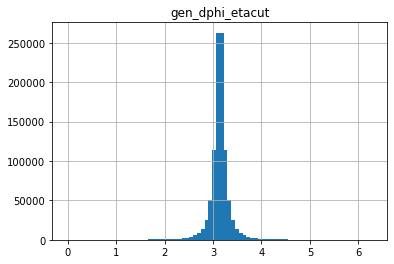

In [11]:
pandas_df_django.hist( column=['gen_dphi_etacut'], bins=80)
plt.show()

## Apply any event selection here.

In [12]:
pandas_df_rapgap = pandas_df_rapgap.query('Empz > 0')

pandas_df_rapgap = pandas_df_rapgap.query('obs_event_Empz > 46 and obs_event_Empz < 62')

pandas_df_rapgap = pandas_df_rapgap.query('obs_hfs_pt > 0')

pandas_df_rapgap = pandas_df_rapgap.query('from_tlv_gen_Q2 > 200')

pandas_df_rapgap = pandas_df_rapgap.query('e_ecal_over_trk_ratio > 0')

#-- 2023-06-23 : remove small fraction of events that have gen_hfs_etacut_e = 0

pandas_df_rapgap = pandas_df_rapgap.query('gen_hfs_etacut_e > 0')

print('\n\n Number of entries in pandas_df_rapgap:  %d ' % pandas_df_rapgap.shape[0] )



 Number of entries in pandas_df_rapgap:  205896 


In [13]:
pandas_df_django = pandas_df_django.query('Empz > 0')

pandas_df_django = pandas_df_django.query('obs_event_Empz > 46 and obs_event_Empz < 62')

pandas_df_django = pandas_df_django.query('obs_hfs_pt > 0')

pandas_df_django = pandas_df_django.query('from_tlv_gen_Q2 > 200')

pandas_df_django = pandas_df_django.query('e_ecal_over_trk_ratio > 0')

#-- 2023-06-23 : remove small fraction of events that have gen_hfs_etacut_e = 0

pandas_df_django = pandas_df_django.query('gen_hfs_etacut_e > 0')

print('\n\n Number of entries in pandas_df_django:  %d ' % pandas_df_django.shape[0] )



 Number of entries in pandas_df_django:  188724 


In [14]:
pandas_df_rapgap

,has_isr,has_fsr,tower_sum_40,n_towers_40,eta_pho_closest_to_ebeam,e_pho_closest_to_ebeam,phi_pho_closest_to_ebeam,obs_x[0],obs_x[1],obs_x[2],...,rot_Empz2,gen_log_x,gen_log_y,gen_log_Q2,e_ecal_over_trk_ratio,dphi_pho_closest_to_ebeam,has_norad,obs_ptbal,obs_pzbal,gen_dphi_etacut
entry,,,,,,,,,,,,,,,,,,,,,
23,0,0,24.247692,1,-0.182699,0.144760,2.422777,0.015283,0.019567,0.009369,...,43.001450,-4.329937,-1.276337,5.922210,1.071315,0.428013,True,0.060719,-0.101689,3.202085
36,0,1,13.348120,1,-1.709016,0.566964,-0.436204,0.003809,0.002255,0.004362,...,37.739708,-5.503805,-0.571310,5.453369,0.988650,2.755722,False,-0.035760,0.033116,3.166307
45,0,0,25.104801,1,-0.021559,1.420366,2.370969,0.013934,0.019074,0.008570,...,42.132053,-4.499992,-1.604122,5.424370,2.409008,3.302941,True,0.168212,-0.079415,3.160574
47,0,1,20.143602,1,0.018809,0.729400,-1.816074,0.007061,0.004471,0.008294,...,37.633305,-4.799874,-1.136600,5.592010,1.761387,2.691795,False,0.091957,0.035842,3.144557
56,1,0,32.968731,1,0.195189,0.114277,0.189013,0.092370,0.113946,0.127623,...,38.093636,-1.782004,-2.935359,6.801494,0.950580,3.264253,False,0.052082,0.024048,3.155321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999981,0,1,24.884981,1,0.292431,6.367661,0.279603,0.019342,0.020816,0.015644,...,40.766171,-3.935360,-1.274952,6.318172,3.407837,3.217852,False,0.148053,-0.044422,3.181334
999983,0,0,25.061716,1,-0.025131,0.720398,1.625083,0.018576,0.021142,0.013074,...,41.763626,-4.197383,-1.260675,6.070426,1.020032,3.479133,True,0.073908,-0.069976,3.118414
999984,0,0,25.640160,1,0.309122,3.250085,-2.700743,0.023397,0.021163,0.035084,...,35.848595,-3.649131,-1.201426,6.677927,0.961054,3.185814,True,-0.077671,0.081566,3.147472


In [15]:
pandas_df_django

,has_isr,has_fsr,tower_sum_40,n_towers_40,eta_pho_closest_to_ebeam,e_pho_closest_to_ebeam,phi_pho_closest_to_ebeam,obs_x[0],obs_x[1],obs_x[2],...,rot_Empz2,gen_log_x,gen_log_y,gen_log_Q2,e_ecal_over_trk_ratio,dphi_pho_closest_to_ebeam,has_norad,obs_ptbal,obs_pzbal,gen_dphi_etacut
entry,,,,,,,,,,,,,,,,,,,,,
20,0,0,17.255196,1,-1.066193,0.240274,1.518299,0.004745,0.002059,0.005654,...,37.362167,-5.230584,-0.867193,5.430706,0.931784,2.221198,True,0.123451,0.042788,3.177054
22,0,0,29.893789,1,0.895007,0.601942,2.087080,0.052515,0.058272,0.067616,...,38.152119,-2.721840,-2.399088,6.407556,0.984936,2.996598,True,-0.094159,0.022550,3.175841
27,0,0,23.783131,1,-0.131410,0.446848,-1.933851,0.011714,0.016146,0.008042,...,41.864983,-4.471905,-1.468582,5.587996,1.080399,2.321987,True,0.317030,-0.072573,3.076885
33,1,0,24.646885,1,1.005825,0.120665,0.242550,0.015225,0.018389,0.011058,...,41.343658,-4.208622,-1.516757,5.799310,1.080347,1.063548,False,0.240941,-0.059217,3.212621
38,0,0,12.380091,1,-2.888133,1.764309,-0.540577,0.003480,0.003441,0.003494,...,38.996613,-5.732018,-0.448362,5.348104,0.986371,3.510371,True,-0.131654,0.000914,3.076051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999982,0,0,28.603111,1,1.137593,0.353021,2.561538,0.050721,0.048526,0.045049,...,39.275661,-2.801988,-3.108065,5.618430,1.025504,4.922769,True,0.139607,-0.006235,3.144722
999990,0,0,26.976902,1,0.950164,0.146069,0.658000,0.024683,0.025408,0.020825,...,39.817383,-3.745168,-2.031664,5.751651,1.019650,3.083025,True,0.114468,-0.020114,3.152536
999991,0,0,23.629290,1,0.747284,0.530796,-0.661516,0.013162,0.008984,0.017554,...,37.043198,-4.140296,-1.513961,5.874227,0.927302,3.209472,True,0.212422,0.050960,3.134143


## Rapgap plots

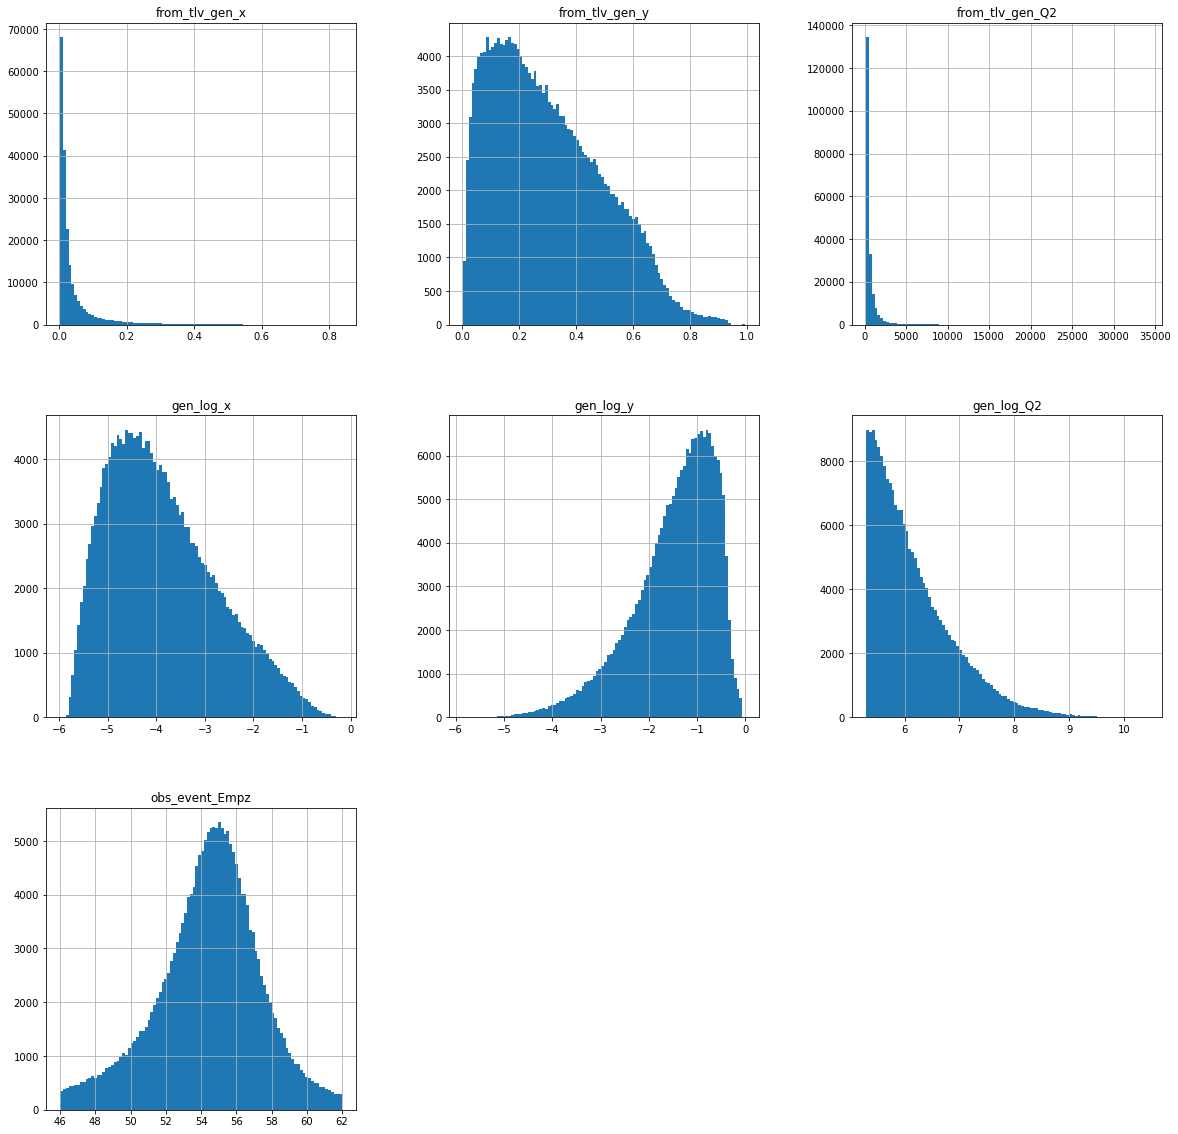

In [16]:
pandas_df_rapgap.hist( figsize=(20,20), bins=100, column=['from_tlv_gen_x','from_tlv_gen_y','from_tlv_gen_Q2',
                        'gen_log_x','gen_log_y','gen_log_Q2','obs_event_Empz', 
                        ])
plt.show()

## Django plots

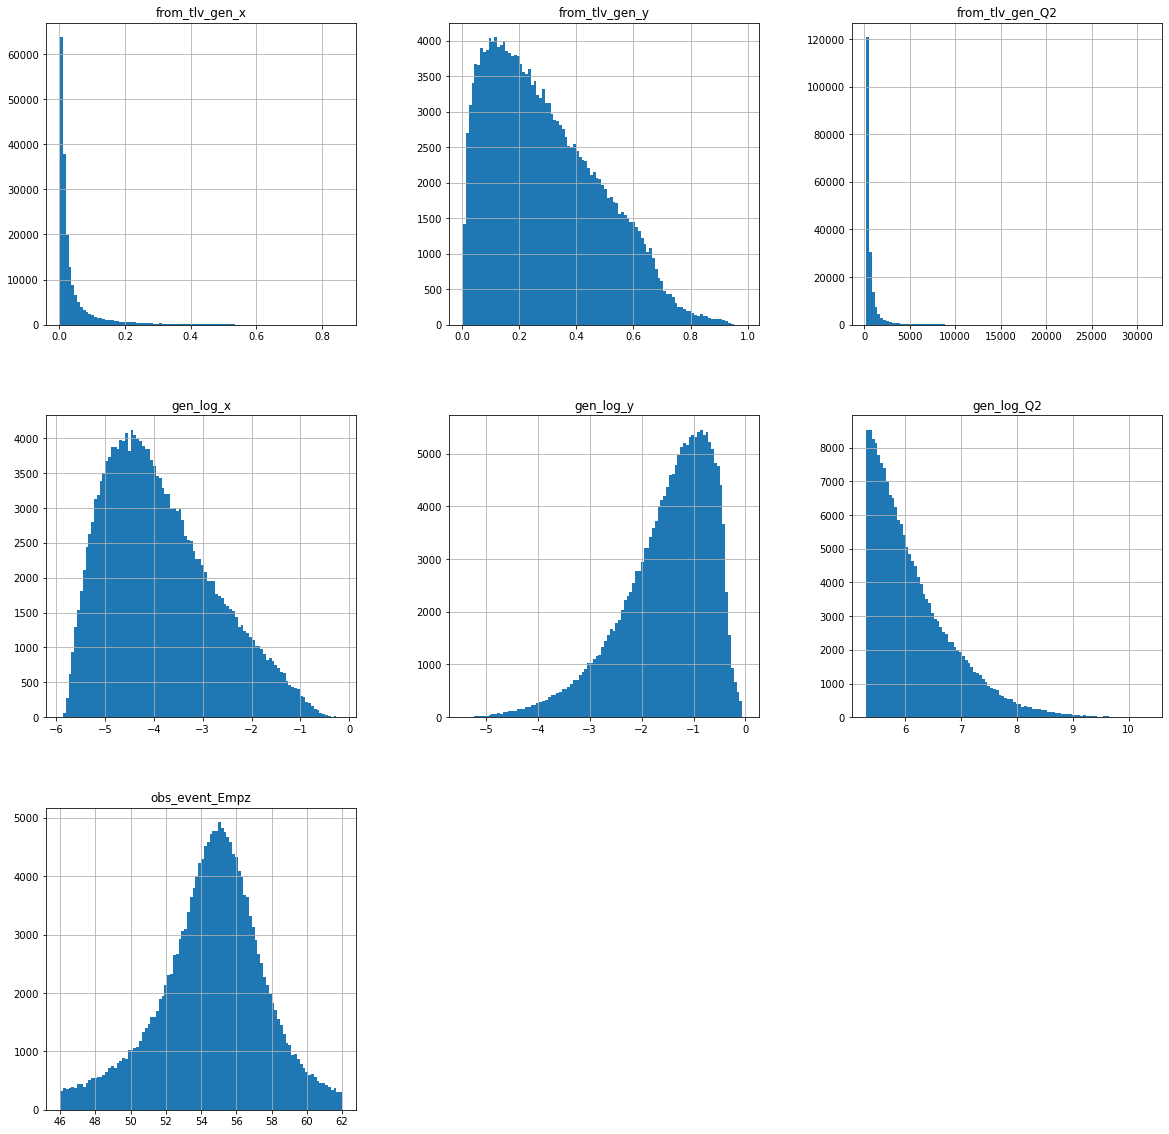

In [17]:
pandas_df_django.hist( figsize=(20,20), bins=100, column=['from_tlv_gen_x','from_tlv_gen_y','from_tlv_gen_Q2',
                        'gen_log_x','gen_log_y','gen_log_Q2','obs_event_Empz', 
                        ])
plt.show()

## Comparison of gen x, y, Q2

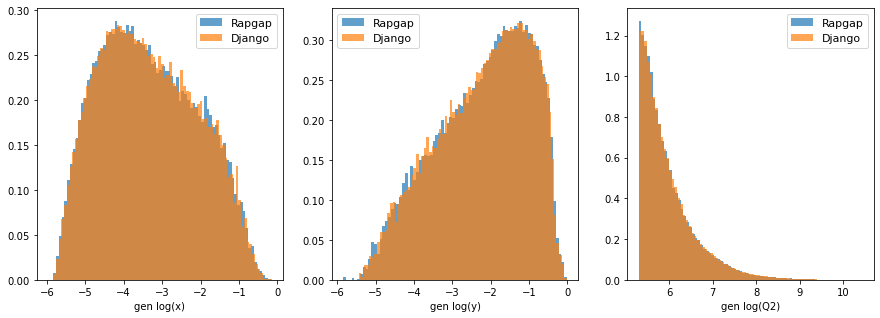

In [18]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

hbins=80
halpha=0.7

ax[0].hist( pandas_df_rapgap['gen_log_x'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[0].hist( pandas_df_django['gen_log_x'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )

ax[1].hist( pandas_df_rapgap['gen_log_y'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[1].hist( pandas_df_django['gen_log_y'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )

ax[2].hist( pandas_df_rapgap['gen_log_Q2'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[2].hist( pandas_df_django['gen_log_Q2'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )


ax[0].set_xlabel('gen log(x)')
ax[1].set_xlabel('gen log(y)')
ax[2].set_xlabel('gen log(Q2)')

ax[0].legend( loc='best', fontsize=11)
ax[1].legend( loc='best', fontsize=11)
ax[2].legend( loc='best', fontsize=11)

plt.show()

## Rapgap ISR/FSR vars

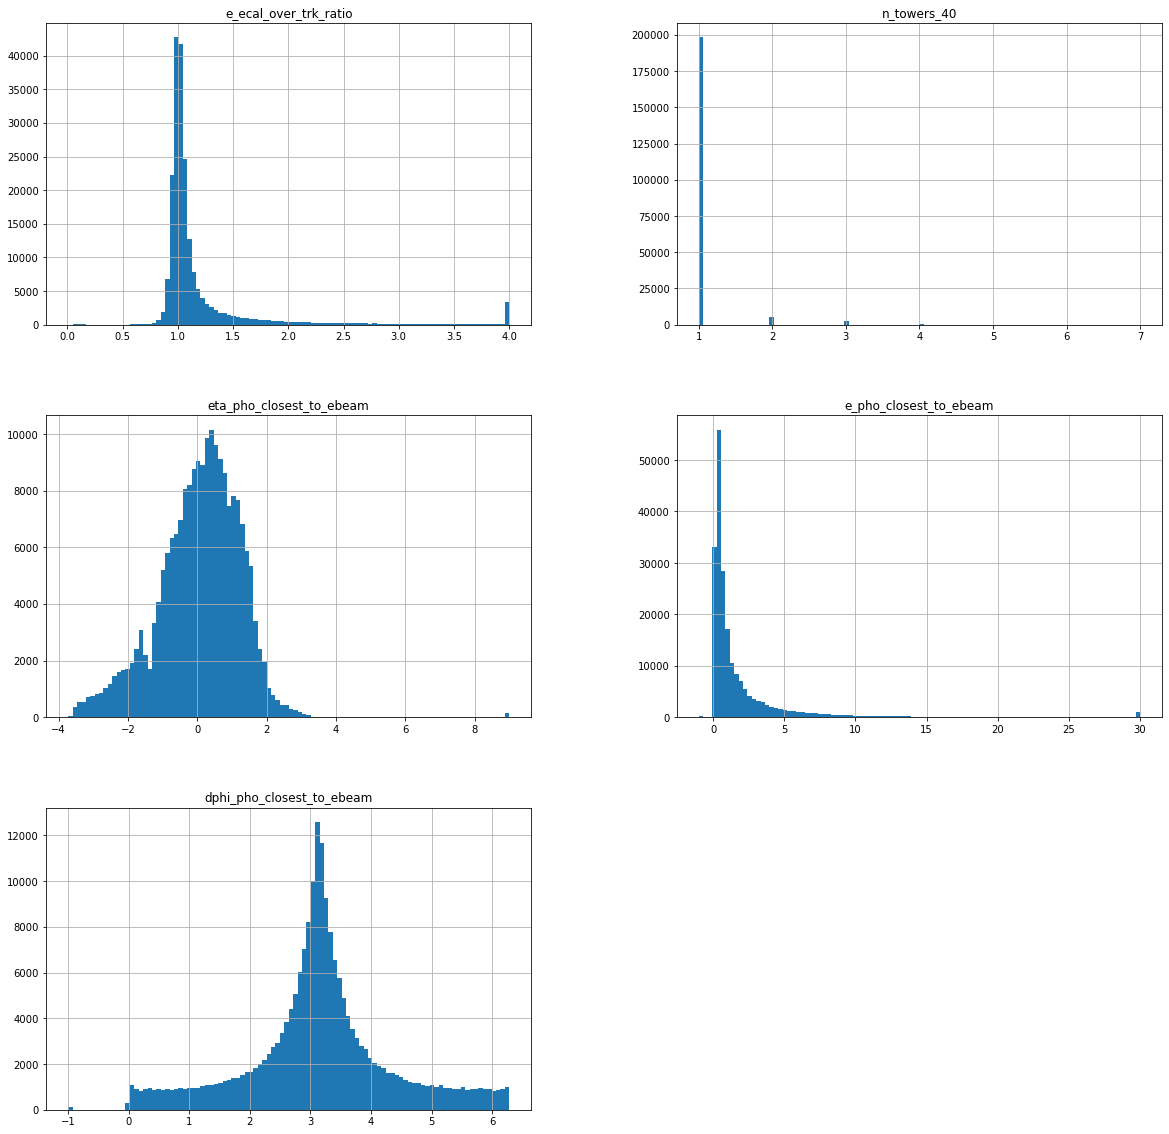

In [19]:

pandas_df_rapgap.hist( figsize=(20,20), bins=100, column=[
                        'e_ecal_over_trk_ratio','n_towers_40',
                        'eta_pho_closest_to_ebeam','e_pho_closest_to_ebeam', 'dphi_pho_closest_to_ebeam'])

plt.show()


## Django ISR/FSR vars

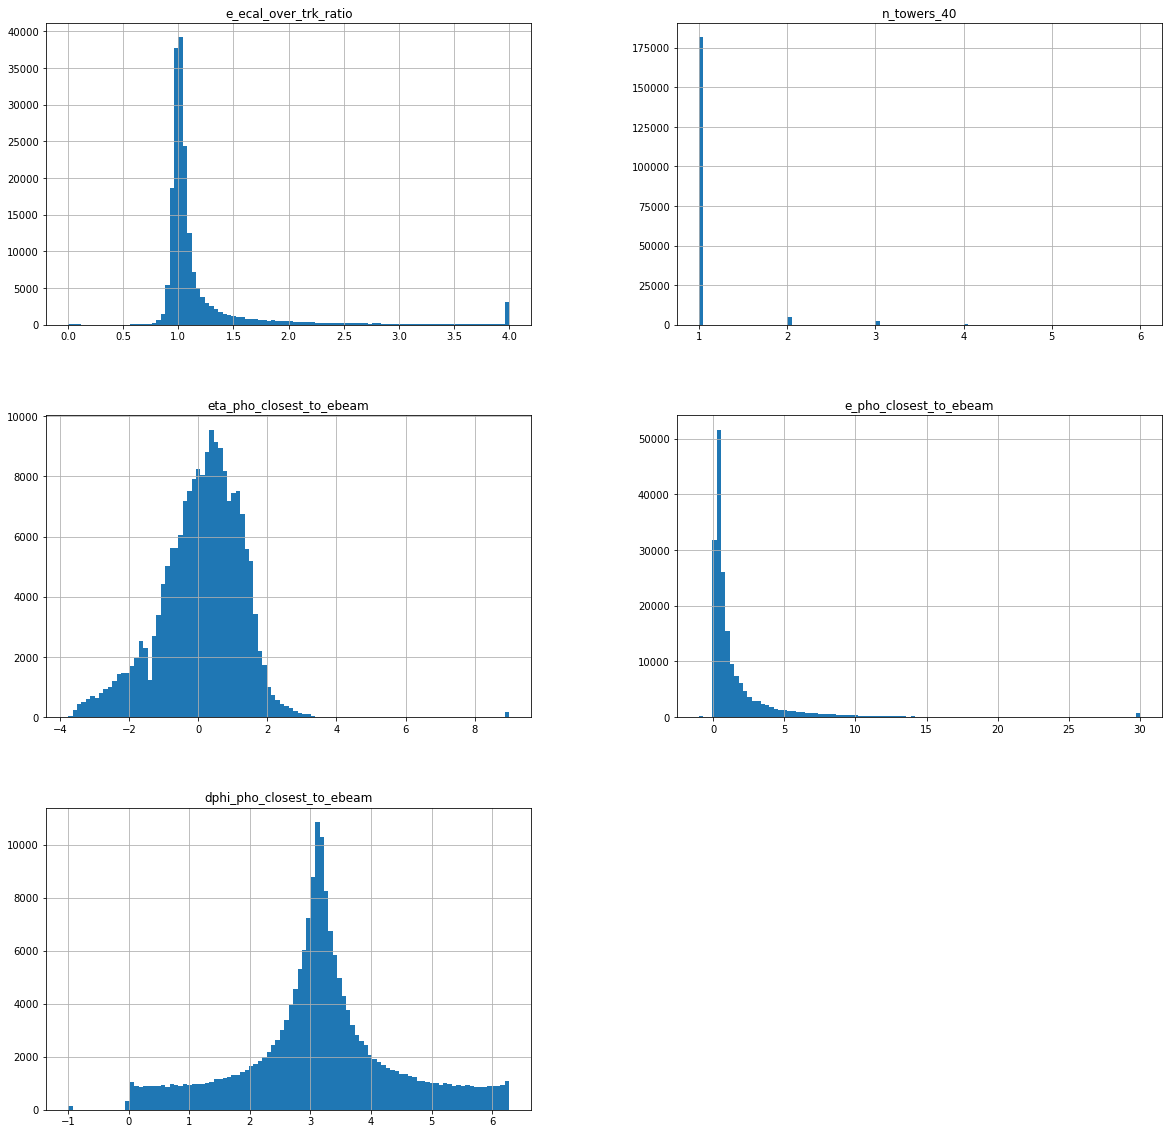

In [20]:

pandas_df_django.hist( figsize=(20,20), bins=100, column=[
                        'e_ecal_over_trk_ratio','n_towers_40',
                        'eta_pho_closest_to_ebeam','e_pho_closest_to_ebeam', 'dphi_pho_closest_to_ebeam'])

plt.show()


## Rapgap plots

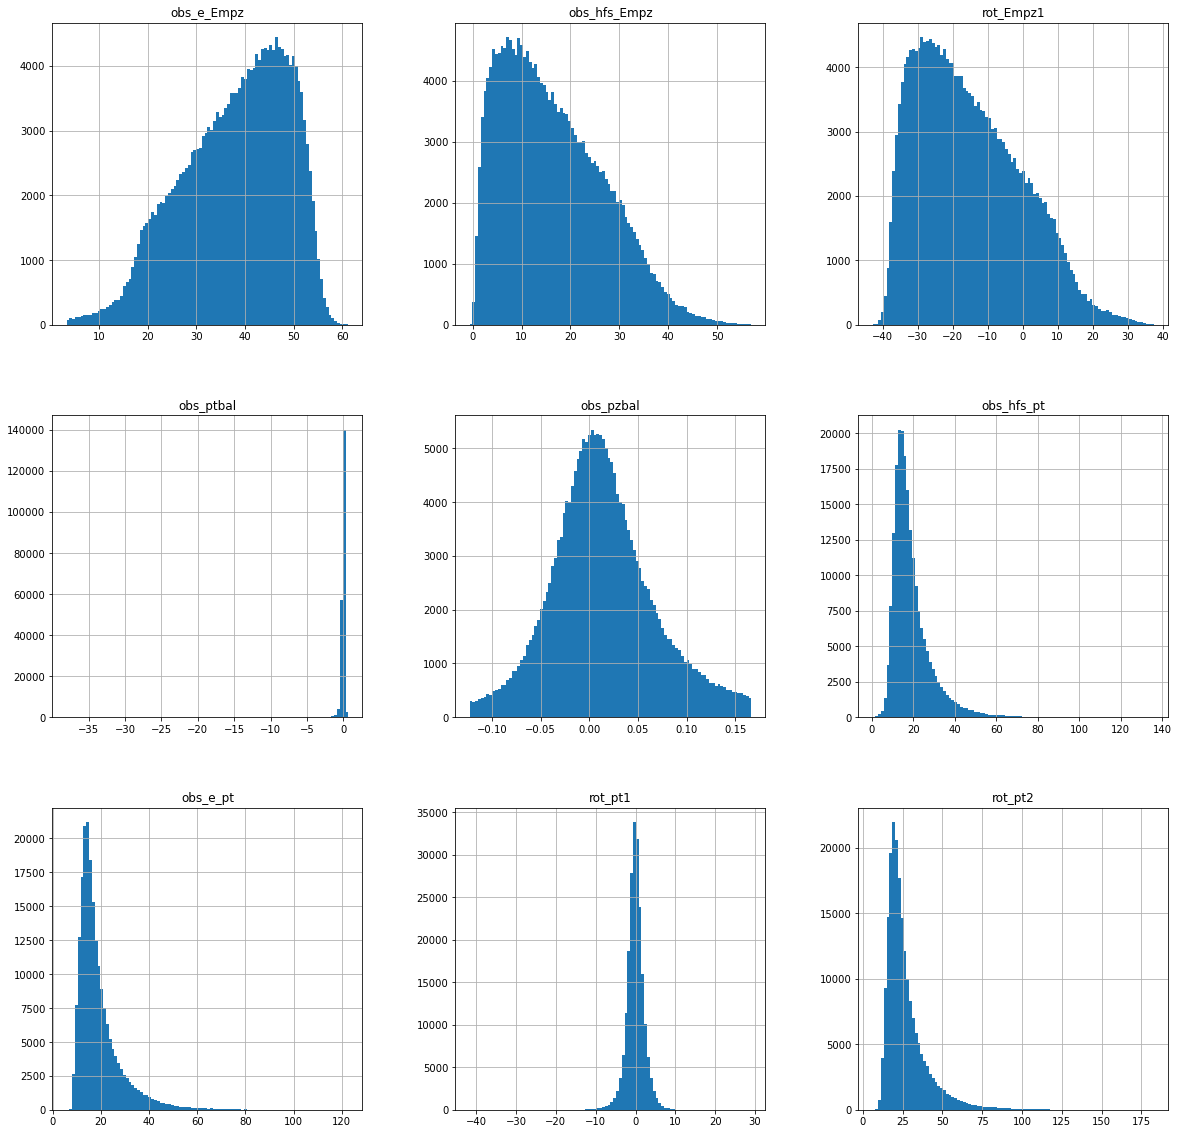

In [21]:
pandas_df_rapgap.hist( figsize=(20,20), bins=100, column=[
    'obs_e_Empz','obs_hfs_Empz',
    'rot_Empz1',
#    'rot_Empz2',
    'obs_ptbal','obs_pzbal',
    'obs_hfs_pt','obs_e_pt',
    'rot_pt1','rot_pt2'] )

                                                   
plt.show()

## Django plots

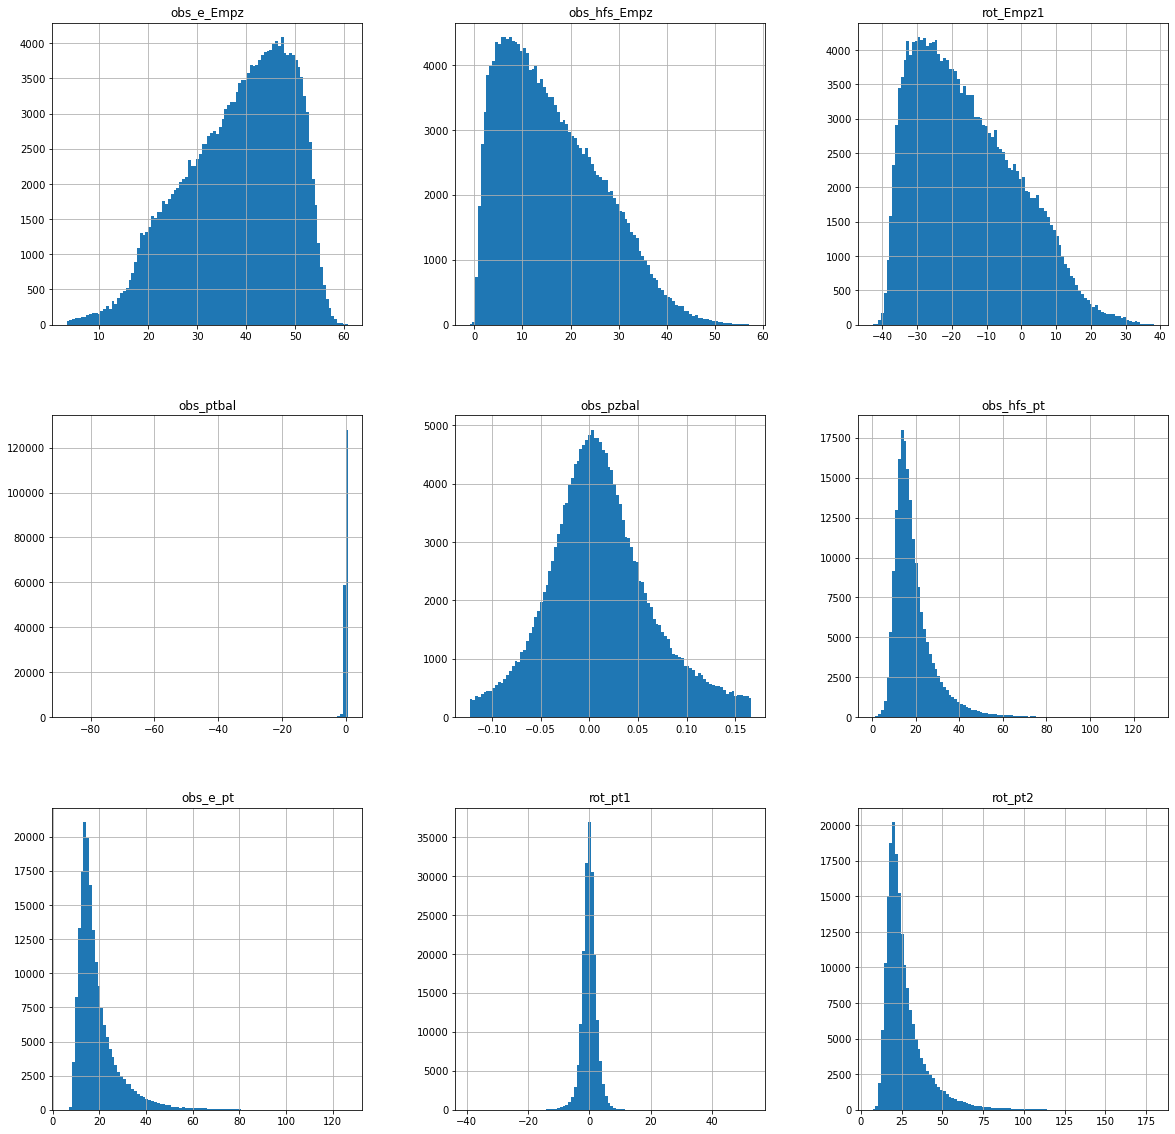

In [22]:
pandas_df_django.hist( figsize=(20,20), bins=100, column=[
    'obs_e_Empz','obs_hfs_Empz',
    'rot_Empz1',
#    'rot_Empz2',
    'obs_ptbal','obs_pzbal',
    'obs_hfs_pt','obs_e_pt',
    'rot_pt1','rot_pt2'] )

                                                   
plt.show()

## Comparison of Rapgap and Django

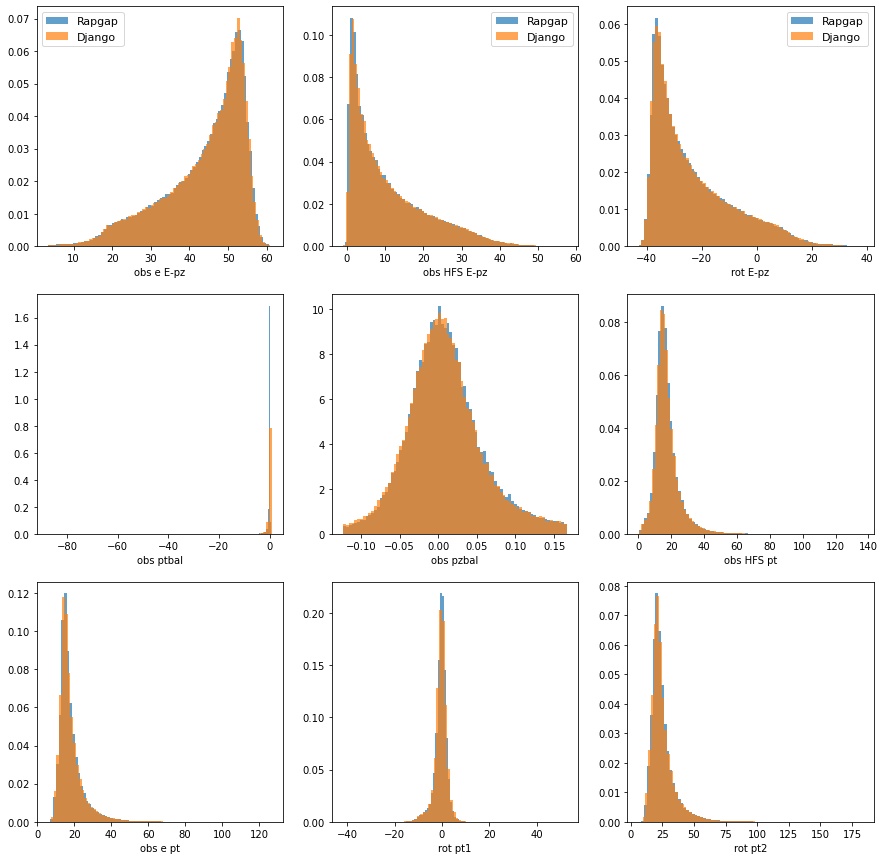

In [23]:
fig,ax = plt.subplots(3,3,figsize=(15,15))

hbins=80
halpha=0.7




ax[0][0].hist( pandas_df_rapgap['obs_e_Empz'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[0][0].hist( pandas_df_django['obs_e_Empz'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )

ax[0][1].hist( pandas_df_rapgap['obs_hfs_Empz'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[0][1].hist( pandas_df_django['obs_hfs_Empz'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )

ax[0][2].hist( pandas_df_rapgap['rot_Empz1'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[0][2].hist( pandas_df_django['rot_Empz1'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )




ax[1][0].hist( pandas_df_rapgap['obs_ptbal'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[1][0].hist( pandas_df_django['obs_ptbal'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )

ax[1][1].hist( pandas_df_rapgap['obs_pzbal'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[1][1].hist( pandas_df_django['obs_pzbal'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )

ax[1][2].hist( pandas_df_rapgap['obs_hfs_pt'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[1][2].hist( pandas_df_django['obs_hfs_pt'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )






ax[2][0].hist( pandas_df_rapgap['obs_e_pt'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[2][0].hist( pandas_df_django['obs_e_pt'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )

ax[2][1].hist( pandas_df_rapgap['rot_pt1'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[2][1].hist( pandas_df_django['rot_pt1'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )

ax[2][2].hist( pandas_df_rapgap['rot_pt2'], weights=pandas_df_rapgap['wgt'], label='Rapgap', density=True, bins=hbins, alpha=halpha )
ax[2][2].hist( pandas_df_django['rot_pt2'], weights=pandas_df_django['wgt'], label='Django', density=True, bins=hbins, alpha=halpha )







ax[0][0].set_xlabel('obs e E-pz')
ax[0][1].set_xlabel('obs HFS E-pz')
ax[0][2].set_xlabel('rot E-pz')

ax[1][0].set_xlabel('obs ptbal')
ax[1][1].set_xlabel('obs pzbal')
ax[1][2].set_xlabel('obs HFS pt')

ax[2][0].set_xlabel('obs e pt')
ax[2][1].set_xlabel('rot pt1')
ax[2][2].set_xlabel('rot pt2')




ax[0][0].legend( loc='best', fontsize=11)
ax[0][1].legend( loc='best', fontsize=11)
ax[0][2].legend( loc='best', fontsize=11)

plt.show()

## Rapgap, comparison of detector and particle (obs and gen)

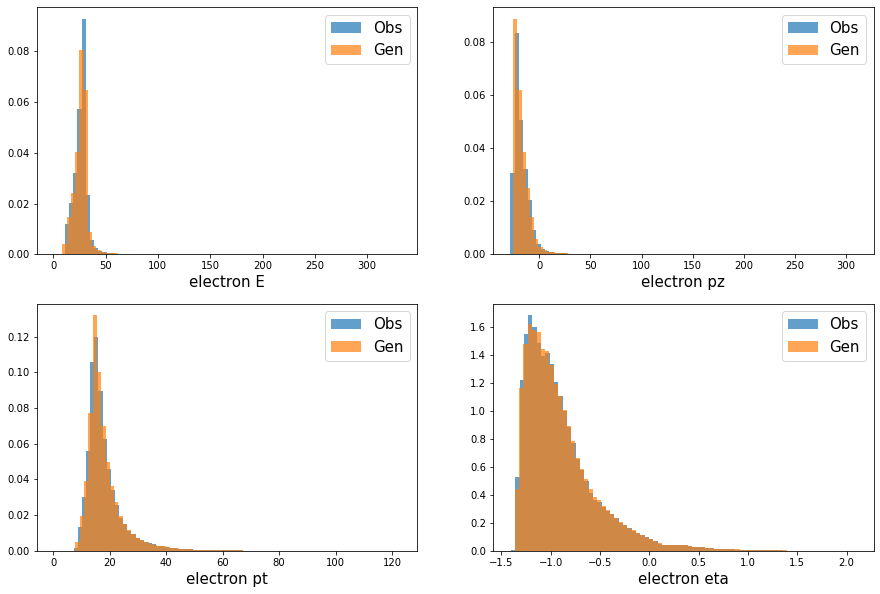

In [24]:
fig,ax = plt.subplots(2,2,figsize=(15,10))

hbins=80
halpha=0.7




ax[0][0].hist( pandas_df_rapgap['obs_e_e'], weights=pandas_df_rapgap['wgt'], label='Obs', density=True, bins=hbins, alpha=halpha )
ax[0][0].hist( pandas_df_rapgap['gen_e_e'], weights=pandas_df_rapgap['wgt'], label='Gen', density=True, bins=hbins, alpha=halpha )

ax[0][1].hist( pandas_df_rapgap['obs_e_pz'], weights=pandas_df_rapgap['wgt'], label='Obs', density=True, bins=hbins, alpha=halpha )
ax[0][1].hist( pandas_df_rapgap['gen_e_pz'], weights=pandas_df_rapgap['wgt'], label='Gen', density=True, bins=hbins, alpha=halpha )

ax[1][0].hist( pandas_df_rapgap['obs_e_pt'], weights=pandas_df_rapgap['wgt'], label='Obs', density=True, bins=hbins, alpha=halpha )
ax[1][0].hist( pandas_df_rapgap['gen_e_pt'], weights=pandas_df_rapgap['wgt'], label='Gen', density=True, bins=hbins, alpha=halpha )

ax[1][1].hist( pandas_df_rapgap['obs_e_eta'], weights=pandas_df_rapgap['wgt'], label='Obs', density=True, bins=hbins, alpha=halpha )
ax[1][1].hist( pandas_df_rapgap['gen_e_eta'], weights=pandas_df_rapgap['wgt'], label='Gen', density=True, bins=hbins, alpha=halpha )


hfontsize=15

ax[0][0].set_xlabel('electron E', fontsize=hfontsize)
ax[0][1].set_xlabel('electron pz', fontsize=hfontsize)

ax[1][0].set_xlabel('electron pt', fontsize=hfontsize)
ax[1][1].set_xlabel('electron eta', fontsize=hfontsize)

ax[0][0].legend( loc='best', fontsize=hfontsize)
ax[0][1].legend( loc='best', fontsize=hfontsize)

ax[1][0].legend( loc='best', fontsize=hfontsize)
ax[1][1].legend( loc='best', fontsize=hfontsize)





plt.show()

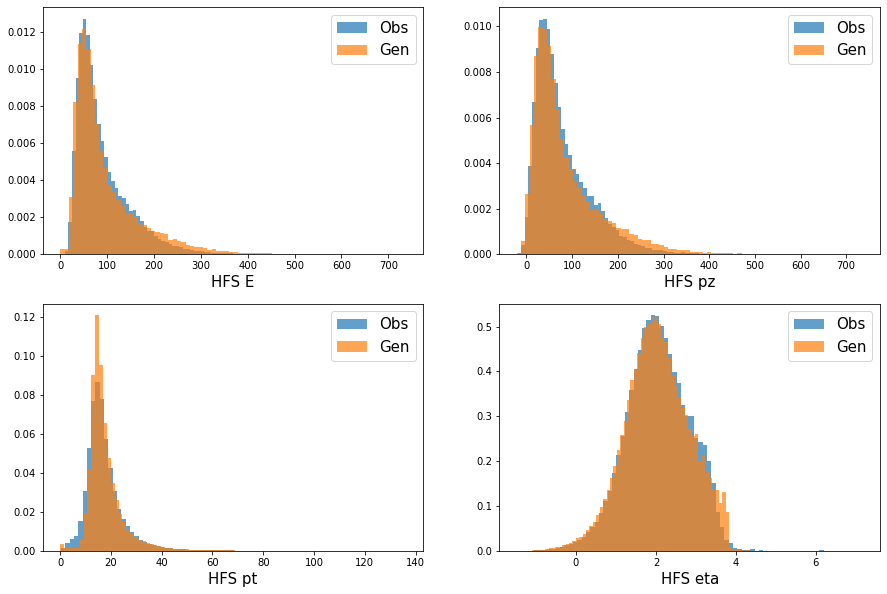

In [25]:
fig,ax = plt.subplots(2,2,figsize=(15,10))

hbins=80
halpha=0.7




ax[0][0].hist( pandas_df_rapgap['obs_hfs_e'], weights=pandas_df_rapgap['wgt'], label='Obs', density=True, bins=hbins, alpha=halpha )
ax[0][0].hist( pandas_df_rapgap['gen_hfs_etacut_e'], weights=pandas_df_rapgap['wgt'], label='Gen', density=True, bins=hbins, alpha=halpha )

ax[0][1].hist( pandas_df_rapgap['obs_hfs_pz'], weights=pandas_df_rapgap['wgt'], label='Obs', density=True, bins=hbins, alpha=halpha )
ax[0][1].hist( pandas_df_rapgap['gen_hfs_etacut_pz'], weights=pandas_df_rapgap['wgt'], label='Gen', density=True, bins=hbins, alpha=halpha )

ax[1][0].hist( pandas_df_rapgap['obs_hfs_pt'], weights=pandas_df_rapgap['wgt'], label='Obs', density=True, bins=hbins, alpha=halpha )
ax[1][0].hist( pandas_df_rapgap['gen_hfs_etacut_pt'], weights=pandas_df_rapgap['wgt'], label='Gen', density=True, bins=hbins, alpha=halpha )

ax[1][1].hist( pandas_df_rapgap['obs_hfs_eta'], weights=pandas_df_rapgap['wgt'], label='Obs', density=True, bins=hbins, alpha=halpha )
ax[1][1].hist( pandas_df_rapgap['gen_hfs_etacut_eta'], weights=pandas_df_rapgap['wgt'], label='Gen', density=True, bins=hbins, alpha=halpha )

hfontsize=15

ax[0][0].set_xlabel('HFS E', fontsize=hfontsize)
ax[0][1].set_xlabel('HFS pz', fontsize=hfontsize)

ax[1][0].set_xlabel('HFS pt', fontsize=hfontsize)
ax[1][1].set_xlabel('HFS eta', fontsize=hfontsize)

ax[0][0].legend( loc='best', fontsize=hfontsize)
ax[0][1].legend( loc='best', fontsize=hfontsize)

ax[1][0].legend( loc='best', fontsize=hfontsize)
ax[1][1].legend( loc='best', fontsize=hfontsize)



plt.show()

## Look at the distribution of event weights.

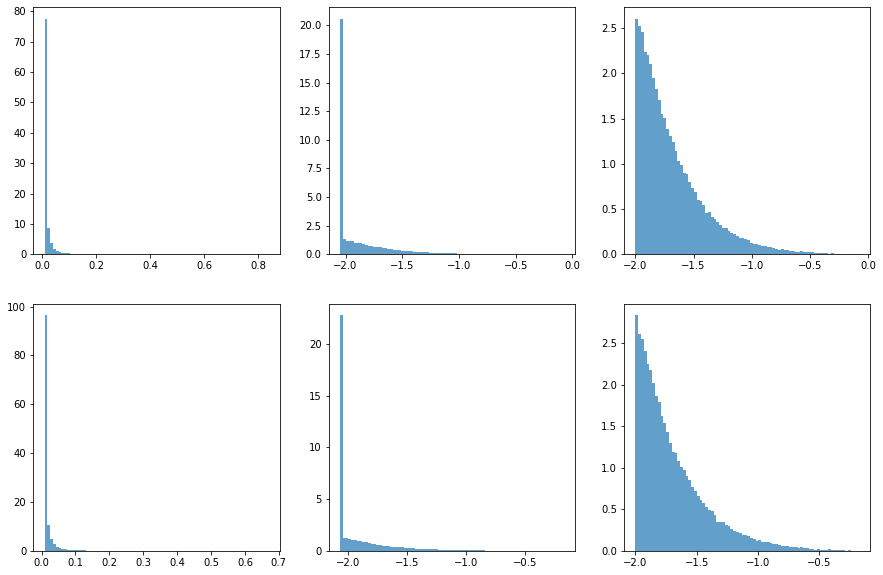

In [26]:
fig,ax = plt.subplots(2,3,figsize=(15,10))

ax[0][0].hist( pandas_df_rapgap['wgt'], density=True, bins=hbins, alpha=halpha )

ax[0][1].hist( np.log10(pandas_df_rapgap['wgt']), density=True, bins=hbins, alpha=halpha )

ax[0][2].hist( np.log10(pandas_df_rapgap.query('wgt>0.01')['wgt']), density=True, bins=hbins, alpha=halpha )

ax[1][0].hist( pandas_df_django['wgt'], density=True, bins=hbins, alpha=halpha )

ax[1][1].hist( np.log10(pandas_df_django['wgt']), density=True, bins=hbins, alpha=halpha )

ax[1][2].hist( np.log10(pandas_df_django.query('wgt>0.01')['wgt']), density=True, bins=hbins, alpha=halpha )

plt.show()

## Set up machine learning stuff

In [27]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pickle import dump

#-- Ben suggested to try this.  2021-08-07
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(patience=20,
               verbose=True,
               restore_best_weights=True)

import os

print(tf.config.list_physical_devices())

if has_gpu :
    os.environ['CUDA_VISIBLE_DEVICES']="0"
    physical_devices = tf.config.list_physical_devices('GPU') 
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


#####physical_devices = tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-06-28 10:22:52.501052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 10:22:52.518182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 10:22:52.518419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [28]:
X_gen_r = np.c_[
    pandas_df_rapgap['gen_e_e'].to_numpy(),
    pandas_df_rapgap['gen_e_pz'].to_numpy(),
    pandas_df_rapgap['gen_e_pt'].to_numpy(),
    pandas_df_rapgap['gen_e_eta'].to_numpy(),
    pandas_df_rapgap['gen_hfs_etacut_e'].to_numpy(),
    pandas_df_rapgap['gen_hfs_etacut_pz'].to_numpy(),
    pandas_df_rapgap['gen_hfs_etacut_pt'].to_numpy(),
    pandas_df_rapgap['gen_hfs_etacut_eta'].to_numpy(),
    pandas_df_rapgap['gen_dphi_etacut'].to_numpy(),
]

X_obs_r = np.c_[
    pandas_df_rapgap['obs_e_e'].to_numpy(),
    pandas_df_rapgap['obs_e_pz'].to_numpy(),
    pandas_df_rapgap['obs_e_pt'].to_numpy(),
    pandas_df_rapgap['obs_e_eta'].to_numpy(),
    pandas_df_rapgap['obs_hfs_e'].to_numpy(),
    pandas_df_rapgap['obs_hfs_pz'].to_numpy(),
    pandas_df_rapgap['obs_hfs_pt'].to_numpy(),
    pandas_df_rapgap['obs_hfs_eta'].to_numpy(),
    pandas_df_rapgap['obs_dphi'].to_numpy(),
]


w_r = np.c_[
    pandas_df_rapgap['wgt'].to_numpy(),
]

Y_r = np.c_[
    np.ones(len(pandas_df_rapgap))
]

In [29]:
print(" shapes:  X_gen_r = %s , X_obs_r = %s , w_r = %s , Y_r = %s" % ( str(np.shape(X_gen_r)), str(np.shape(X_obs_r)), str(np.shape(w_r)), str(np.shape(Y_r)) ) )


 shapes:  X_gen_r = (205896, 9) , X_obs_r = (205896, 9) , w_r = (205896, 1) , Y_r = (205896, 1)


In [30]:
X_gen_d = np.c_[
    pandas_df_django['gen_e_e'].to_numpy(),
    pandas_df_django['gen_e_pz'].to_numpy(),
    pandas_df_django['gen_e_pt'].to_numpy(),
    pandas_df_django['gen_e_eta'].to_numpy(),
    pandas_df_django['gen_hfs_etacut_e'].to_numpy(),
    pandas_df_django['gen_hfs_etacut_pz'].to_numpy(),
    pandas_df_django['gen_hfs_etacut_pt'].to_numpy(),
    pandas_df_django['gen_hfs_etacut_eta'].to_numpy(),
    pandas_df_django['gen_dphi_etacut'].to_numpy(),
]

X_obs_d = np.c_[
    pandas_df_django['obs_e_e'].to_numpy(),
    pandas_df_django['obs_e_pz'].to_numpy(),
    pandas_df_django['obs_e_pt'].to_numpy(),
    pandas_df_django['obs_e_eta'].to_numpy(),
    pandas_df_django['obs_hfs_e'].to_numpy(),
    pandas_df_django['obs_hfs_pz'].to_numpy(),
    pandas_df_django['obs_hfs_pt'].to_numpy(),
    pandas_df_django['obs_hfs_eta'].to_numpy(),
    pandas_df_django['obs_dphi'].to_numpy(),
]




w_d = np.c_[
    pandas_df_django['wgt'].to_numpy(),
]

Y_d = np.c_[
    np.zeros(len(pandas_df_django))
]


In [31]:
print(" shapes:  X_gen_d = %s , X_obs_d = %s , w_d = %s , Y_d = %s" % ( str(np.shape(X_gen_d)), str(np.shape(X_obs_d)), str(np.shape(w_d)), str(np.shape(Y_d)) ) )

 shapes:  X_gen_d = (188724, 9) , X_obs_d = (188724, 9) , w_d = (188724, 1) , Y_d = (188724, 1)


In [32]:
X_gen = np.concatenate( [X_gen_r, X_gen_d] )
X_obs = np.concatenate( [X_obs_r, X_obs_d] )
w = np.concatenate( [w_r, w_d])
Y = np.concatenate( [Y_r, Y_d])

In [33]:
print(" shapes:  X_gen = %s , X_obs = %s ,  w = %s , Y = %s" % ( str(np.shape(X_gen)),  str(np.shape(X_obs)), str(np.shape(w)), str(np.shape(Y)) ) )

 shapes:  X_gen = (394620, 9) , X_obs = (394620, 9) ,  w = (394620, 1) , Y = (394620, 1)


In [34]:
X_gen

array([[ 23.27876663, -16.51725578,  16.40369606, ...,  16.67554092,
          1.93788922,   3.20208526],
       [ 13.49057484,  -9.36167717,   9.71362972, ...,   9.75612164,
          2.02149129,   3.16630697],
       [ 24.10554504, -19.99560928,  13.46301937, ...,  13.40249443,
          1.97886217,   3.16057396],
       ...,
       [ 24.74935532, -18.30461884,  16.65747643, ...,  19.51171875,
          1.80885768,   3.13414288],
       [ 17.63134575, -12.16270733,  12.76451683, ...,  12.81779766,
          2.39699221,   2.90925169],
       [ 16.86113167, -12.35686684,  11.47194862, ...,  12.00433064,
          1.4289782 ,   3.2485919 ]])

In [35]:
X_obs

array([[ 24.247692 , -17.285646 ,  17.004618 , ...,  18.103865 ,
          2.3029   ,   3.2084012],
       [ 13.34812  ,  -9.203184 ,   9.6681795, ...,   9.334386 ,
          2.4759128,   3.1380625],
       [ 25.104801 , -20.77686  ,  14.091598 , ...,  16.941334 ,
          1.0790696,   3.1579218],
       ...,
       [ 23.62929  , -17.42142  ,  15.96363  , ...,  20.26926  ,
          1.6776757,   3.1531951],
       [ 17.70024  , -12.266632 ,  12.760416 , ...,  11.131652 ,
          2.4180973,   2.860546 ],
       [ 17.346737 , -12.664872 ,  11.8537035, ...,  11.726436 ,
          1.3032305,   3.8477929]], dtype=float32)

In [36]:
scalerX = StandardScaler()
scalerX.fit(X_gen)
Xs_gen = scalerX.transform(X_gen)
Xs_obs = scalerX.transform(X_obs)

In [37]:
X_gen_train, X_gen_test, X_obs_train, X_obs_test, Y_train, Y_test, w_train, w_test = train_test_split( Xs_gen, Xs_obs, Y, w, test_size=0.5 )

In [38]:
print("\n shapes:  X_gen_train = %s , X_obs_train = %s" % ( str(np.shape(X_gen_train)), str(np.shape(X_obs_train))))


 shapes:  X_gen_train = (197310, 9) , X_obs_train = (197310, 9)


In [39]:
Xs_so_gen_d = scalerX.transform( X_gen_d )
Xs_so_obs_d = scalerX.transform( X_obs_d )
Xs_so_gen_r = scalerX.transform( X_gen_r )
Xs_so_obs_r = scalerX.transform( X_obs_r )

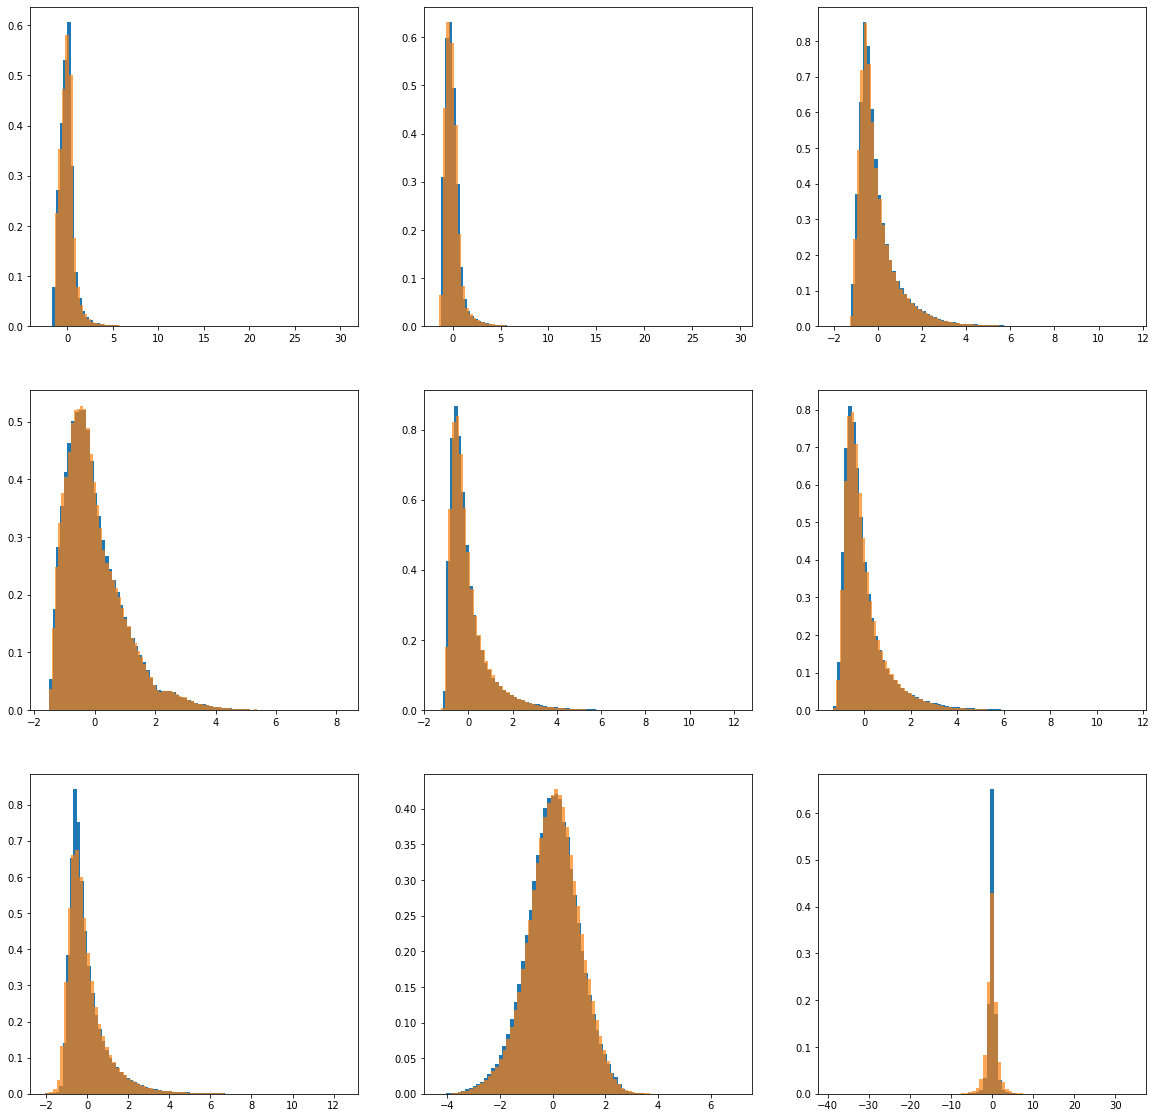

In [40]:
fig,ax = plt.subplots(3,3,figsize=(20,20))

hbins = 80


ax[0][0].hist( Xs_gen[:,0], density=True, bins=hbins )
ax[0][1].hist( Xs_gen[:,1], density=True, bins=hbins )
ax[0][2].hist( Xs_gen[:,2], density=True, bins=hbins )

ax[1][0].hist( Xs_gen[:,3], density=True, bins=hbins )
ax[1][1].hist( Xs_gen[:,4], density=True, bins=hbins )
ax[1][2].hist( Xs_gen[:,5], density=True, bins=hbins )

ax[2][0].hist( Xs_gen[:,6], density=True, bins=hbins )
ax[2][1].hist( Xs_gen[:,7], density=True, bins=hbins )
ax[2][2].hist( Xs_gen[:,8], density=True, bins=hbins )



ax[0][0].hist( Xs_obs[:,0], density=True, bins=hbins, alpha=0.7 )
ax[0][1].hist( Xs_obs[:,1], density=True, bins=hbins, alpha=0.7 )
ax[0][2].hist( Xs_obs[:,2], density=True, bins=hbins, alpha=0.7 )

ax[1][0].hist( Xs_obs[:,3], density=True, bins=hbins, alpha=0.7 )
ax[1][1].hist( Xs_obs[:,4], density=True, bins=hbins, alpha=0.7 )
ax[1][2].hist( Xs_obs[:,5], density=True, bins=hbins , alpha=0.7)

ax[2][0].hist( Xs_obs[:,6], density=True, bins=hbins, alpha=0.7 )
ax[2][1].hist( Xs_obs[:,7], density=True, bins=hbins , alpha=0.7)
ax[2][2].hist( Xs_obs[:,8], density=True, bins=hbins, alpha=0.7 )



plt.show()

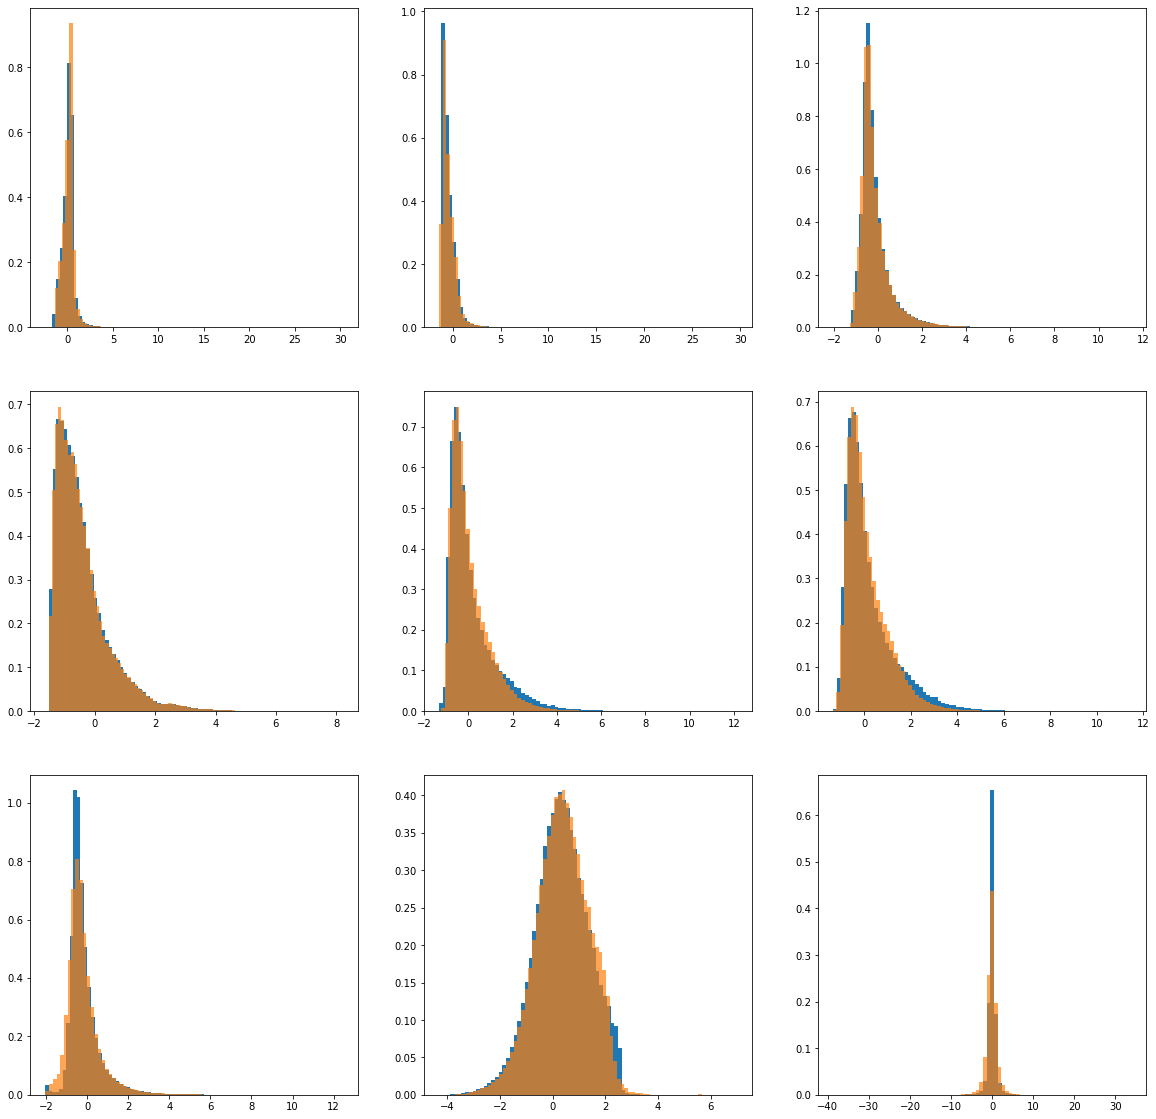

In [41]:
fig,ax = plt.subplots(3,3,figsize=(20,20))

hbins = 80


ax[0][0].hist( Xs_gen[:,0], density=True, bins=hbins, weights=w )
ax[0][1].hist( Xs_gen[:,1], density=True, bins=hbins, weights=w )
ax[0][2].hist( Xs_gen[:,2], density=True, bins=hbins, weights=w )

ax[1][0].hist( Xs_gen[:,3], density=True, bins=hbins, weights=w )
ax[1][1].hist( Xs_gen[:,4], density=True, bins=hbins, weights=w )
ax[1][2].hist( Xs_gen[:,5], density=True, bins=hbins, weights=w )

ax[2][0].hist( Xs_gen[:,6], density=True, bins=hbins, weights=w )
ax[2][1].hist( Xs_gen[:,7], density=True, bins=hbins, weights=w )
ax[2][2].hist( Xs_gen[:,8], density=True, bins=hbins, weights=w )



ax[0][0].hist( Xs_obs[:,0], density=True, bins=hbins, alpha=0.7, weights=w )
ax[0][1].hist( Xs_obs[:,1], density=True, bins=hbins, alpha=0.7, weights=w )
ax[0][2].hist( Xs_obs[:,2], density=True, bins=hbins, alpha=0.7, weights=w )

ax[1][0].hist( Xs_obs[:,3], density=True, bins=hbins, alpha=0.7, weights=w )
ax[1][1].hist( Xs_obs[:,4], density=True, bins=hbins, alpha=0.7, weights=w )
ax[1][2].hist( Xs_obs[:,5], density=True, bins=hbins, alpha=0.7, weights=w )

ax[2][0].hist( Xs_obs[:,6], density=True, bins=hbins, alpha=0.7, weights=w )
ax[2][1].hist( Xs_obs[:,7], density=True, bins=hbins, alpha=0.7, weights=w )
ax[2][2].hist( Xs_obs[:,8], density=True, bins=hbins, alpha=0.7, weights=w )



plt.show()

In [42]:
def weighted_binary_crossentropy(y_true, y_pred):
    weights = tf.gather(y_true, [1], axis=1) # event weights
    y_true = tf.gather(y_true, [0], axis=1) # actual y_true for loss
    
    # Clip the prediction value to prevent NaN's and Inf's
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    t_loss = -weights * ((y_true) * K.log(y_pred) +
                         (1 - y_true) * K.log(1 - y_pred))
    return K.mean(t_loss)

def weighted_mse(y_true, y_pred):
    weights = tf.gather(y_true, [1], axis=1) # event weights
    y_true = tf.gather(y_true, [0], axis=1) # actual y_true for loss
    return K.mean(weights*(y_true - y_pred)**2)

## Simple classifier (Django vs Rapgap), using only particle-level features

In [43]:
model = Sequential()
model.add(Dense(50, input_dim=9, activation='relu')) 
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-06-28 10:22:56.532512: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 10:22:56.532750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 10:22:56.532918: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 10:22:56.920615: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 10:22:56.920832: I tensorflow/compiler/xla/stream_executo

In [44]:
#model = Sequential()
#model.add(Dense(150, input_dim=9, activation='relu')) 
#model.add(Dense(350, activation='relu'))
#model.add(Dense(150, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
#model = Sequential()
#model.add(Dense(150, input_dim=9, activation='relu')) 
#model.add(Dense(350, activation='relu'))
#model.add(Dense(350, activation='relu'))
#model.add(Dense(150, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
#model = Sequential()
#model.add(Dense(150, input_dim=9, activation='relu')) 
#model.add(Dense(350, activation='relu'))
#model.add(Dense(650, activation='relu'))
#model.add(Dense(350, activation='relu'))
#model.add(Dense(150, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
#model = Sequential()
#model.add(Dense(150, input_dim=9, activation='relu')) 
#model.add(Dense(350, activation='relu'))
#model.add(Dense(550, activation='relu'))
#model.add(Dense(850, activation='relu'))
#model.add(Dense(350, activation='relu'))
#model.add(Dense(150, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(patience=20,
               verbose=True,
               restore_best_weights=True)

In [49]:
%%time

#hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=1024,verbose = 1)
#hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=2048,verbose = 1)
#hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=4096,verbose = 1)
#hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=8192,verbose = 1)

#hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=8192,
#                 verbose = 1, callbacks=[earlystopping] )

#hist = model.fit(X_gen_train, Y_train, validation_data=(X_gen_test, Y_test), epochs=200, batch_size=4096,
#                 verbose = 1, callbacks=[earlystopping] )

hist = model.fit(X_obs_train, Y_train, validation_data=(X_obs_test, Y_test), epochs=200, batch_size=4096,
                 verbose = 1, callbacks=[earlystopping] )

Epoch 1/200


2023-06-28 10:22:57.915715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-28 10:22:57.918279: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f7edc015910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-28 10:22:57.918314: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-06-28 10:22:57.924616: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-28 10:22:58.030203: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


49/49 [==============================] - 2s 6ms/step - loss: 0.6820 - accuracy: 0.5665 - val_loss: 0.6784 - val_accuracy: 0.5783
Epoch 2/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.5803 - val_loss: 0.6769 - val_accuracy: 0.5806
Epoch 3/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5816 - val_loss: 0.6764 - val_accuracy: 0.5817
Epoch 4/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.5831 - val_loss: 0.6761 - val_accuracy: 0.5817
Epoch 5/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.5836 - val_loss: 0.6757 - val_accuracy: 0.5821
Epoch 6/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5838 - val_loss: 0.6755 - val_accuracy: 0.5822
Epoch 7/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5840 - val_loss: 0.6751 - val_accuracy: 0.5822
Epoch 8/200
49/49 [======

Epoch 59/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5880 - val_loss: 0.6742 - val_accuracy: 0.5843
Epoch 60/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.5880 - val_loss: 0.6740 - val_accuracy: 0.5854
Epoch 61/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5880 - val_loss: 0.6740 - val_accuracy: 0.5852
Epoch 62/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.5878 - val_loss: 0.6739 - val_accuracy: 0.5848
Epoch 63/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.5882 - val_loss: 0.6744 - val_accuracy: 0.5848
Epoch 64/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.5872 - val_loss: 0.6738 - val_accuracy: 0.5853
Epoch 65/200
49/49 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5879 - val_loss: 0.6738 - val_accuracy: 0.5846
Epoch 

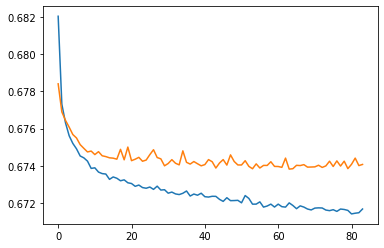

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [51]:
classifier_output_gen = model.predict( X_gen_test, batch_size=1024)
classifier_output_obs = model.predict( X_obs_test, batch_size=1024)

193/193 [==============================] - 0s 559us/step


In [52]:
so_classifier_output_django_gen = model.predict( Xs_so_gen_d, batch_size=2048 )
so_classifier_output_django_obs = model.predict( Xs_so_obs_d, batch_size=2048 )
so_classifier_output_rapgap_gen = model.predict( Xs_so_gen_r, batch_size=2048 )
so_classifier_output_rapgap_obs = model.predict( Xs_so_obs_r, batch_size=2048 )

101/101 [==============================] - 0s 581us/step


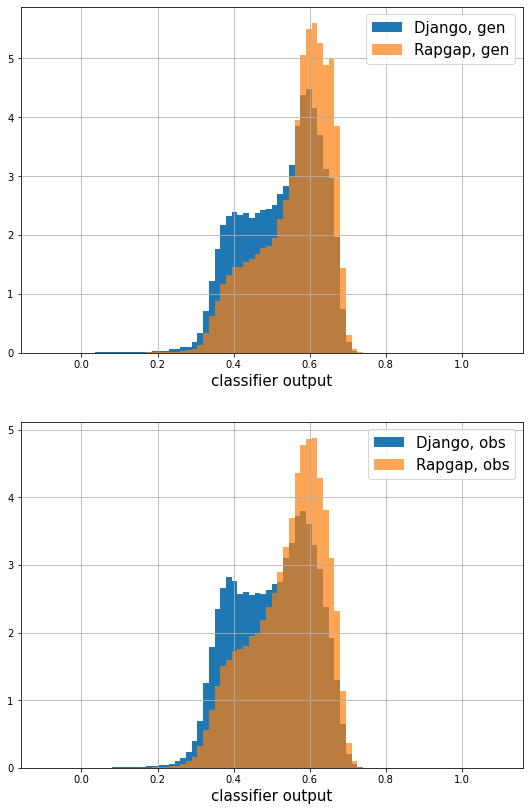

In [53]:
fig,ax = plt.subplots(2,1,figsize=(9,14))

hist0 = ax[0].hist( classifier_output_gen[Y_test==0], density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
hist1 = ax[0].hist( classifier_output_gen[Y_test==1], density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen', alpha=0.7)

hist0_obs = ax[1].hist( classifier_output_obs[Y_test==0], density=True, bins=80, range=[-0.1,1.1], label='Django, obs')
hist1_obs = ax[1].hist( classifier_output_obs[Y_test==1], density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7)

ax[0].grid()
ax[1].grid()


hfontsize=15

ax[0].set_xlabel('classifier output', fontsize=hfontsize)
ax[1].set_xlabel('classifier output', fontsize=hfontsize)



ax[0].legend( loc='best', fontsize=hfontsize)
ax[1].legend( loc='best', fontsize=hfontsize)

plt.show()

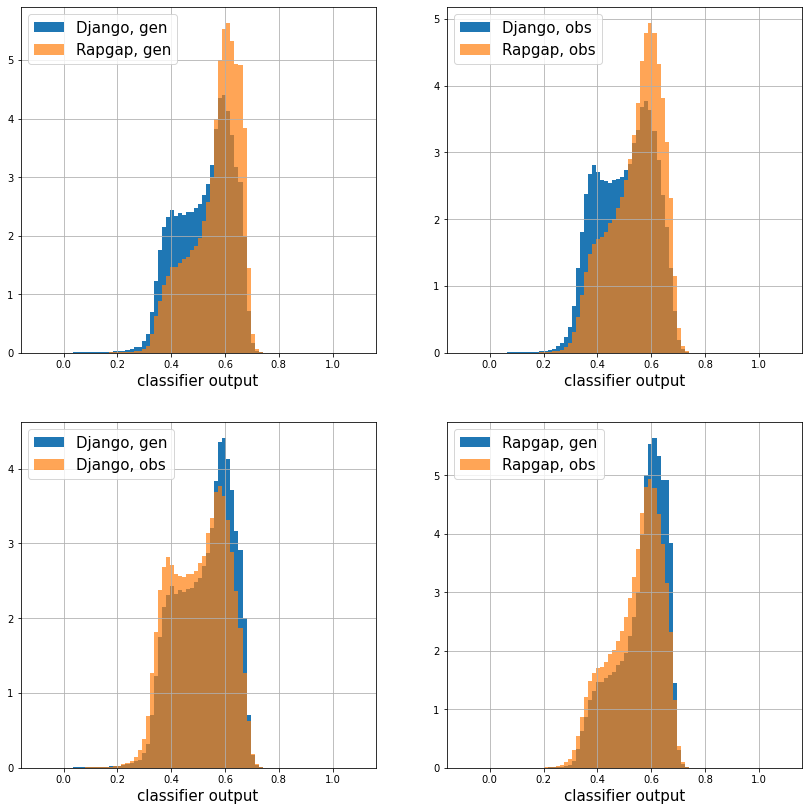

In [54]:
fig,ax = plt.subplots(2,2,figsize=(14,14))

ax[0][0].hist( so_classifier_output_django_gen, density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
ax[0][0].hist( so_classifier_output_rapgap_gen, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen', alpha=0.7)
      
ax[0][1].hist( so_classifier_output_django_obs, density=True, bins=80, range=[-0.1,1.1], label='Django, obs' )
ax[0][1].hist( so_classifier_output_rapgap_obs, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7)

ax[1][0].hist( so_classifier_output_django_gen, density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
ax[1][0].hist( so_classifier_output_django_obs, density=True, bins=80, range=[-0.1,1.1], label='Django, obs', alpha=0.7 )


ax[1][1].hist( so_classifier_output_rapgap_gen, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen' )
ax[1][1].hist( so_classifier_output_rapgap_obs, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7 )




ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()



hfontsize=15

ax[0][0].set_xlabel('classifier output', fontsize=hfontsize)
ax[1][0].set_xlabel('classifier output', fontsize=hfontsize)
ax[0][1].set_xlabel('classifier output', fontsize=hfontsize)
ax[1][1].set_xlabel('classifier output', fontsize=hfontsize)



ax[0][0].legend( loc='best', fontsize=hfontsize)
ax[1][0].legend( loc='best', fontsize=hfontsize)
ax[0][1].legend( loc='best', fontsize=hfontsize)
ax[1][1].legend( loc='best', fontsize=hfontsize)


plt.show()

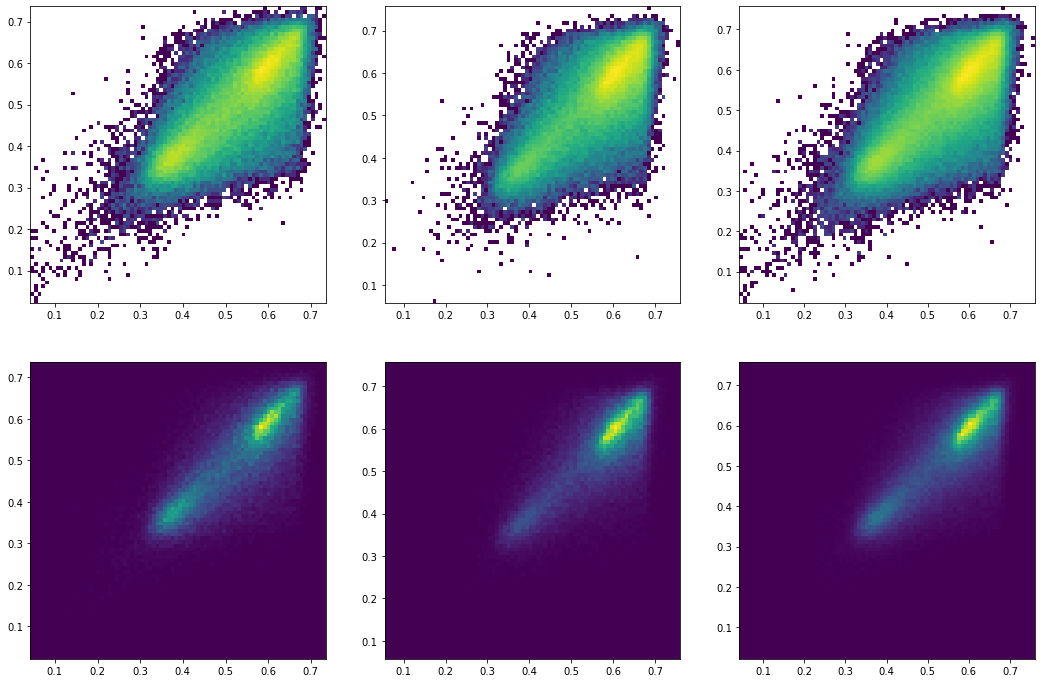

In [55]:
fig,ax = plt.subplots(2,3,figsize=(18,12))

ax[0][0].hist2d( classifier_output_gen[Y_test==0], classifier_output_obs[Y_test==0], bins=80, norm=mpl.colors.LogNorm())
ax[0][1].hist2d( classifier_output_gen[Y_test==1], classifier_output_obs[Y_test==1], bins=80, norm=mpl.colors.LogNorm())
ax[0][2].hist2d( classifier_output_gen[Y_test>-1], classifier_output_obs[Y_test>-1], bins=80, norm=mpl.colors.LogNorm())

ax[1][0].hist2d( classifier_output_gen[Y_test==0], classifier_output_obs[Y_test==0], bins=80)
ax[1][1].hist2d( classifier_output_gen[Y_test==1], classifier_output_obs[Y_test==1], bins=80)
ax[1][2].hist2d( classifier_output_gen[Y_test>-1], classifier_output_obs[Y_test>-1], bins=80)


plt.show()

In [56]:
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [57]:
fpr, tpr, _ = roc_curve( Y_test, classifier_output_gen)

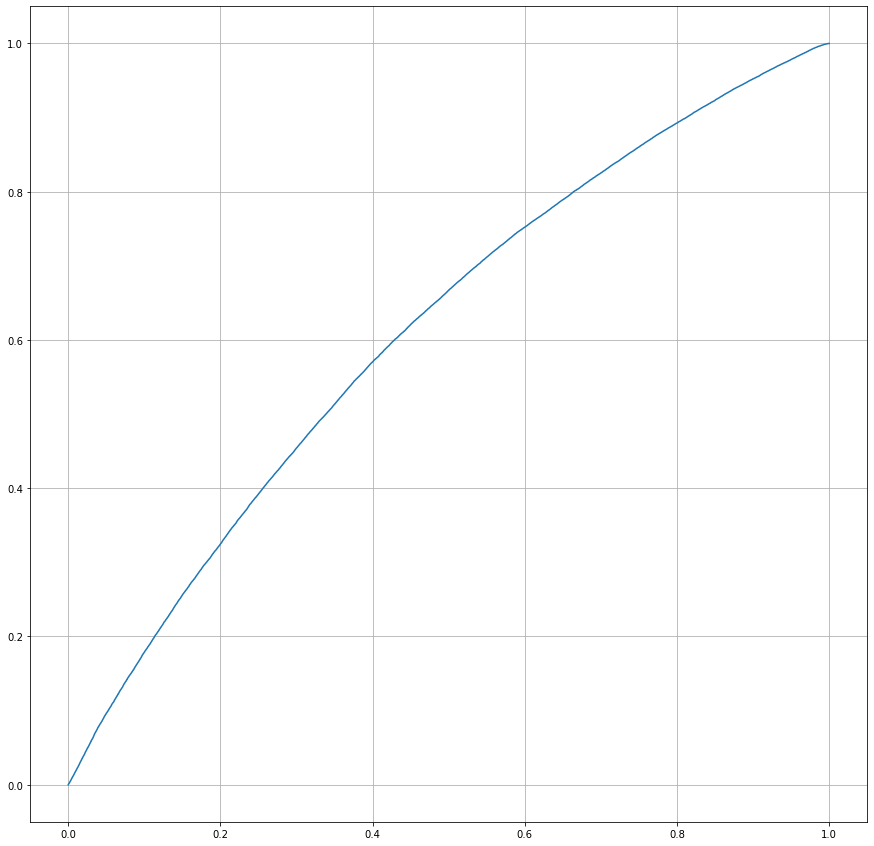

In [58]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
plt.plot( fpr, tpr)
plt.grid()
plt.show()

In [59]:
hist0

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.23473098e-03, 9.17525273e-03, 6.35209647e-03,
        7.05788497e-03, 4.94051948e-03, 1.05868274e-02, 1.27041929e-02,
        1.19984044e-02, 1.19984044e-02, 1.62331354e-02, 2.54083859e-02,
        2.68199629e-02, 3.38778478e-02, 6.21093877e-02, 6.98731306e-02,
        9.31639890e-02, 1.04456801e-01, 1.86327978e-01, 3.34544080e-01,
        7.13551461e-01, 1.21113426e+00, 1.76446949e+00, 2.17312494e+00,
        2.31992448e+00, 2.39121380e+00, 2.34745021e+00, 2.37004013e+00,
        2.29592770e+00, 2.37498065e+00, 2.42226371e+00, 2.44838273e+00,
        2.50414007e+00, 2.69399737e+00, 2.83937866e+00, 3.18663823e+00,
        3.85854954e+00, 4.37659881e+00, 4.47397995e+00, 4.15992153e+00,
        3.69480645e+00, 3.12241141e+00, 2.97136072e+00, 1.96774028e+00,
        7.41078658e-01, 1.74329932e-01, 3.45835333e-02, 2.823156

In [60]:
len(hist0[0])

80

In [61]:
sum(hist0[0])

66.66666487398307

In [62]:
sum(hist1[0])

66.66666314348146

In [63]:
import numpy as np

In [64]:
total0 = sum(hist0[0])
total1 = sum(hist1[0])

npoints = len(hist0[0])
print('Number of points: %d' % npoints)

fr0 = np.zeros(npoints)
fr1 = np.zeros(npoints)

sum0 = float(0)
sum1 = float(0)

for i in range(npoints):
    sum0 += hist0[0][i]
    sum1 += hist1[0][i]
    fr0[i] = 1. - sum0/total0
    fr1[i] = 1. - sum1/total1
    print("  %2d :  fr0 = %7.3f  fr1 = %7.3f" % (i, fr0[i], fr1[i]))

Number of points: 80
   0 :  fr0 =   1.000  fr1 =   1.000
   1 :  fr0 =   1.000  fr1 =   1.000
   2 :  fr0 =   1.000  fr1 =   1.000
   3 :  fr0 =   1.000  fr1 =   1.000
   4 :  fr0 =   1.000  fr1 =   1.000
   5 :  fr0 =   1.000  fr1 =   1.000
   6 :  fr0 =   1.000  fr1 =   1.000
   7 :  fr0 =   1.000  fr1 =   1.000
   8 :  fr0 =   1.000  fr1 =   1.000
   9 :  fr0 =   1.000  fr1 =   1.000
  10 :  fr0 =   1.000  fr1 =   1.000
  11 :  fr0 =   1.000  fr1 =   1.000
  12 :  fr0 =   1.000  fr1 =   1.000
  13 :  fr0 =   1.000  fr1 =   1.000
  14 :  fr0 =   0.999  fr1 =   1.000
  15 :  fr0 =   0.999  fr1 =   1.000
  16 :  fr0 =   0.999  fr1 =   1.000
  17 :  fr0 =   0.999  fr1 =   1.000
  18 :  fr0 =   0.999  fr1 =   1.000
  19 :  fr0 =   0.998  fr1 =   1.000
  20 :  fr0 =   0.998  fr1 =   1.000
  21 :  fr0 =   0.997  fr1 =   1.000
  22 :  fr0 =   0.996  fr1 =   0.999
  23 :  fr0 =   0.995  fr1 =   0.999
  24 :  fr0 =   0.994  fr1 =   0.999
  25 :  fr0 =   0.992  fr1 =   0.998
  26 :  fr0 =   0

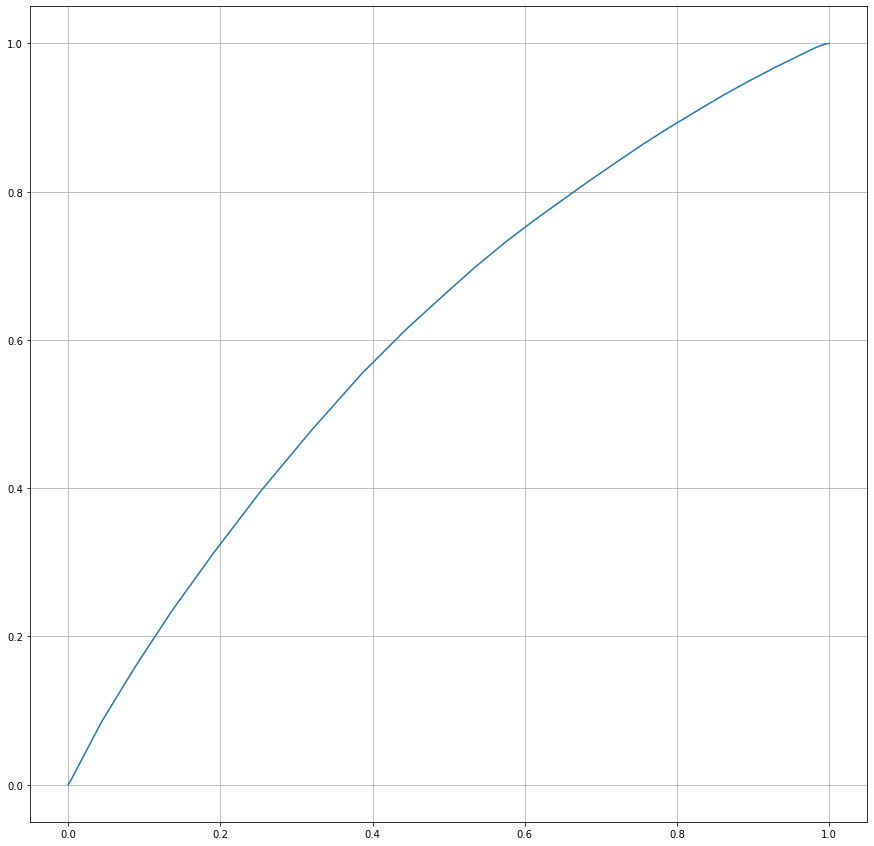

In [65]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
plt.plot( fr0, fr1)
plt.grid()
plt.show()

## Classifier (Django vs Rapgap) with adversarial NN that penalizes gen vs obs discrimination.

In [66]:
X_gen_and_obs = np.concatenate( [X_gen_r, X_gen_d, X_obs_r, X_obs_d] )
w_gen_and_obs = np.concatenate( [w_r, w_d, w_r, w_d])
Y_gen_and_obs = np.concatenate( [Y_r, Y_d, Y_r, Y_d])
Z_gen_and_obs = np.concatenate( [np.zeros(len(X_gen_r)), np.zeros(len(X_gen_d)), np.ones(len(X_obs_r)), np.ones(len(X_obs_d))])

In [67]:
scalerX_gen_and_obs = StandardScaler()
scalerX_gen_and_obs.fit(X_gen_and_obs)
Xs_gen_and_obs = scalerX_gen_and_obs.transform(X_gen_and_obs)

In [68]:
X_gen_and_obs_train, X_gen_and_obs_test, Y_gen_and_obs_train, Y_gen_and_obs_test, Z_gen_and_obs_train, Z_gen_and_obs_test, w_gen_and_obs_train, w_gen_and_obs_test = train_test_split( Xs_gen_and_obs, Y_gen_and_obs, Z_gen_and_obs, w_gen_and_obs, test_size=0.5 )

In [69]:
print("\n shapes:  X_gen_and_obs_train = %s " % str(np.shape(X_gen_and_obs_train)) )
print(" shapes:  Y_gen_and_obs_train = %s " % str(np.shape(Y_gen_and_obs_train)) )
print(" shapes:  Z_gen_and_obs_train = %s \n" % str(np.shape(Z_gen_and_obs_train)) )


 shapes:  X_gen_and_obs_train = (394620, 9) 
 shapes:  Y_gen_and_obs_train = (394620, 1) 
 shapes:  Z_gen_and_obs_train = (394620,) 



In [70]:
@tf.custom_gradient
def grad_reverse(x, scale=10.):
    y = tf.identity(x)
    def custom_grad(dy):
        return -dy * scale
    return y, custom_grad

class GradReverse(tf.keras.layers.Layer):
    def __init__(self):
        super(GradReverse, self).__init__()

    def call(self, x):
        return grad_reverse(x)

In [71]:
n_hidden_inv = 2; n_hidden_inv_R = 5
n_nodes_inv = 50; n_nodes_inv_R = 50
#hp_lambda = 10.
#hp_lambda = 1.
hp_lambda = 0.05

inputs = Input(shape=(9,))
inputs_label = Input(shape=(1,))

Dx = Dense(n_nodes_inv, activation="relu")(inputs)
for i in range(n_hidden_inv -1):
    Dx = Dense(n_nodes_inv, activation='relu')(Dx)
Dx = Dense(1, activation="sigmoid", name="Clf")(Dx)
inv_model = Model(inputs=inputs, outputs=Dx)

GRx = GradReverse()(Dx)
GRx_con = tf.keras.layers.concatenate([GRx,inputs_label])
Rx = Dense(n_nodes_inv_R, activation="relu")(GRx_con)
for i in range(n_hidden_inv_R -1):
    Rx = Dense(n_nodes_inv_R, activation='relu')(Rx)

Rx = Dense(1, activation="sigmoid", name="Adv")(Rx)
GR = Model(inputs=[inputs,inputs_label], outputs=[Dx, Rx])

opt_adam = tf.keras.optimizers.Adam(learning_rate=5e-5, amsgrad=False )

GR.compile(loss=["binary_crossentropy", "binary_crossentropy"], loss_weights=[1,hp_lambda], optimizer=opt_adam) #rmsprop

In [72]:
%%time

GRhist = GR.fit(x=[X_gen_and_obs_train, Y_gen_and_obs_train], 
                y=[Y_gen_and_obs_train, Z_gen_and_obs_train], 
                validation_data=([X_gen_and_obs_test, Y_gen_and_obs_test],[Y_gen_and_obs_test, Z_gen_and_obs_test]),
                epochs=2000, batch_size=512, verbose = 1, callbacks=[earlystopping] )

Epoch 1/2000
771/771 [==============================] - 6s 6ms/step - loss: 0.7230 - Clf_loss: 0.6883 - Adv_loss: 0.6932 - val_loss: 0.7154 - val_Clf_loss: 0.6807 - val_Adv_loss: 0.6931
Epoch 2/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7142 - Clf_loss: 0.6796 - Adv_loss: 0.6927 - val_loss: 0.7124 - val_Clf_loss: 0.6778 - val_Adv_loss: 0.6922
Epoch 3/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7122 - Clf_loss: 0.6777 - Adv_loss: 0.6907 - val_loss: 0.7111 - val_Clf_loss: 0.6766 - val_Adv_loss: 0.6890
Epoch 4/2000
771/771 [==============================] - 4s 5ms/step - loss: 0.7114 - Clf_loss: 0.6770 - Adv_loss: 0.6884 - val_loss: 0.7107 - val_Clf_loss: 0.6763 - val_Adv_loss: 0.6883
Epoch 5/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7112 - Clf_loss: 0.6768 - Adv_loss: 0.6890 - val_loss: 0.7108 - val_Clf_loss: 0.6763 - val_Adv_loss: 0.6892
Epoch 6/2000
771/771 [==============================] - 4s 6ms/step - 

Epoch 45/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7067 - Clf_loss: 0.6722 - Adv_loss: 0.6899 - val_loss: 0.7063 - val_Clf_loss: 0.6718 - val_Adv_loss: 0.6895
Epoch 46/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7066 - Clf_loss: 0.6721 - Adv_loss: 0.6899 - val_loss: 0.7063 - val_Clf_loss: 0.6718 - val_Adv_loss: 0.6897
Epoch 47/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7066 - Clf_loss: 0.6721 - Adv_loss: 0.6900 - val_loss: 0.7062 - val_Clf_loss: 0.6717 - val_Adv_loss: 0.6896
Epoch 48/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7066 - Clf_loss: 0.6721 - Adv_loss: 0.6900 - val_loss: 0.7061 - val_Clf_loss: 0.6717 - val_Adv_loss: 0.6894
Epoch 49/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7066 - Clf_loss: 0.6721 - Adv_loss: 0.6899 - val_loss: 0.7060 - val_Clf_loss: 0.6716 - val_Adv_loss: 0.6894
Epoch 50/2000
771/771 [==============================] - 4s 6ms/s

Epoch 89/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7057 - Clf_loss: 0.6712 - Adv_loss: 0.6899 - val_loss: 0.7054 - val_Clf_loss: 0.6709 - val_Adv_loss: 0.6896
Epoch 90/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7057 - Clf_loss: 0.6712 - Adv_loss: 0.6899 - val_loss: 0.7054 - val_Clf_loss: 0.6709 - val_Adv_loss: 0.6895
Epoch 91/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7057 - Clf_loss: 0.6712 - Adv_loss: 0.6899 - val_loss: 0.7055 - val_Clf_loss: 0.6710 - val_Adv_loss: 0.6898
Epoch 92/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7057 - Clf_loss: 0.6712 - Adv_loss: 0.6900 - val_loss: 0.7054 - val_Clf_loss: 0.6709 - val_Adv_loss: 0.6896
Epoch 93/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7057 - Clf_loss: 0.6712 - Adv_loss: 0.6900 - val_loss: 0.7052 - val_Clf_loss: 0.6707 - val_Adv_loss: 0.6893
Epoch 94/2000
771/771 [==============================] - 4s 6ms/s

Epoch 133/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7051 - Clf_loss: 0.6706 - Adv_loss: 0.6899 - val_loss: 0.7048 - val_Clf_loss: 0.6704 - val_Adv_loss: 0.6895
Epoch 134/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7051 - Clf_loss: 0.6706 - Adv_loss: 0.6899 - val_loss: 0.7049 - val_Clf_loss: 0.6704 - val_Adv_loss: 0.6897
Epoch 135/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7051 - Clf_loss: 0.6706 - Adv_loss: 0.6899 - val_loss: 0.7048 - val_Clf_loss: 0.6703 - val_Adv_loss: 0.6894
Epoch 136/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7051 - Clf_loss: 0.6706 - Adv_loss: 0.6900 - val_loss: 0.7046 - val_Clf_loss: 0.6701 - val_Adv_loss: 0.6891
Epoch 137/2000
771/771 [==============================] - 4s 5ms/step - loss: 0.7050 - Clf_loss: 0.6705 - Adv_loss: 0.6899 - val_loss: 0.7048 - val_Clf_loss: 0.6703 - val_Adv_loss: 0.6894
Epoch 138/2000
771/771 [==============================] - 4s

771/771 [==============================] - 4s 5ms/step - loss: 0.7046 - Clf_loss: 0.6701 - Adv_loss: 0.6899 - val_loss: 0.7044 - val_Clf_loss: 0.6700 - val_Adv_loss: 0.6894
Epoch 177/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7046 - Clf_loss: 0.6701 - Adv_loss: 0.6899 - val_loss: 0.7044 - val_Clf_loss: 0.6700 - val_Adv_loss: 0.6892
Epoch 178/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7046 - Clf_loss: 0.6702 - Adv_loss: 0.6899 - val_loss: 0.7044 - val_Clf_loss: 0.6699 - val_Adv_loss: 0.6892
Epoch 179/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7046 - Clf_loss: 0.6701 - Adv_loss: 0.6898 - val_loss: 0.7046 - val_Clf_loss: 0.6701 - val_Adv_loss: 0.6895
Epoch 180/2000
771/771 [==============================] - 4s 5ms/step - loss: 0.7046 - Clf_loss: 0.6701 - Adv_loss: 0.6899 - val_loss: 0.7045 - val_Clf_loss: 0.6700 - val_Adv_loss: 0.6895
Epoch 181/2000
771/771 [==============================] - 4s 6ms/step - los

Epoch 220/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7043 - Clf_loss: 0.6698 - Adv_loss: 0.6899 - val_loss: 0.7041 - val_Clf_loss: 0.6696 - val_Adv_loss: 0.6894
Epoch 221/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7042 - Clf_loss: 0.6697 - Adv_loss: 0.6898 - val_loss: 0.7041 - val_Clf_loss: 0.6697 - val_Adv_loss: 0.6894
Epoch 222/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7042 - Clf_loss: 0.6697 - Adv_loss: 0.6898 - val_loss: 0.7042 - val_Clf_loss: 0.6697 - val_Adv_loss: 0.6894
Epoch 223/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7042 - Clf_loss: 0.6697 - Adv_loss: 0.6899 - val_loss: 0.7045 - val_Clf_loss: 0.6700 - val_Adv_loss: 0.6898
Epoch 224/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7042 - Clf_loss: 0.6697 - Adv_loss: 0.6899 - val_loss: 0.7042 - val_Clf_loss: 0.6697 - val_Adv_loss: 0.6894
Epoch 225/2000
771/771 [==============================] - 4s

771/771 [==============================] - 4s 6ms/step - loss: 0.7039 - Clf_loss: 0.6694 - Adv_loss: 0.6899 - val_loss: 0.7038 - val_Clf_loss: 0.6694 - val_Adv_loss: 0.6894
Epoch 264/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7038 - Clf_loss: 0.6694 - Adv_loss: 0.6898 - val_loss: 0.7039 - val_Clf_loss: 0.6695 - val_Adv_loss: 0.6895
Epoch 265/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7039 - Clf_loss: 0.6694 - Adv_loss: 0.6899 - val_loss: 0.7039 - val_Clf_loss: 0.6694 - val_Adv_loss: 0.6893
Epoch 266/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7039 - Clf_loss: 0.6694 - Adv_loss: 0.6899 - val_loss: 0.7037 - val_Clf_loss: 0.6693 - val_Adv_loss: 0.6891
Epoch 267/2000
771/771 [==============================] - 4s 6ms/step - loss: 0.7038 - Clf_loss: 0.6693 - Adv_loss: 0.6897 - val_loss: 0.7039 - val_Clf_loss: 0.6694 - val_Adv_loss: 0.6894
Epoch 268/2000
771/771 [==============================] - 4s 6ms/step - los

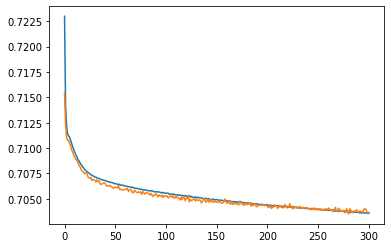

In [73]:
plt.plot(GRhist.history['loss'])
plt.plot(GRhist.history['val_loss'])

In [74]:
print(inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 9), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [75]:
print(inputs_label)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [76]:
print(inv_model)

In [77]:
print(Dx)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='Clf/Sigmoid:0', description="created by layer 'Clf'")


In [78]:
print(GRx)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='grad_reverse/IdentityN:0', description="created by layer 'grad_reverse'")


In [79]:
print(GRx_con)

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


In [80]:
print(Rx)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='Adv/Sigmoid:0', description="created by layer 'Adv'")


In [81]:
print(GR)

In [82]:
classifier_output_adv = inv_model.predict( X_gen_and_obs_test, batch_size=2048 )

193/193 [==============================] - 0s 540us/step


In [83]:
Xs_gen_d = scalerX_gen_and_obs.transform( X_gen_d )
Xs_obs_d = scalerX_gen_and_obs.transform( X_obs_d )
Xs_gen_r = scalerX_gen_and_obs.transform( X_gen_r )
Xs_obs_r = scalerX_gen_and_obs.transform( X_obs_r )




classifier_output_django_gen = inv_model.predict( Xs_gen_d, batch_size=2048 )
classifier_output_django_obs = inv_model.predict( Xs_obs_d, batch_size=2048 )
classifier_output_rapgap_gen = inv_model.predict( Xs_gen_r, batch_size=2048 )
classifier_output_rapgap_obs = inv_model.predict( Xs_obs_r, batch_size=2048 )

101/101 [==============================] - 0s 544us/step


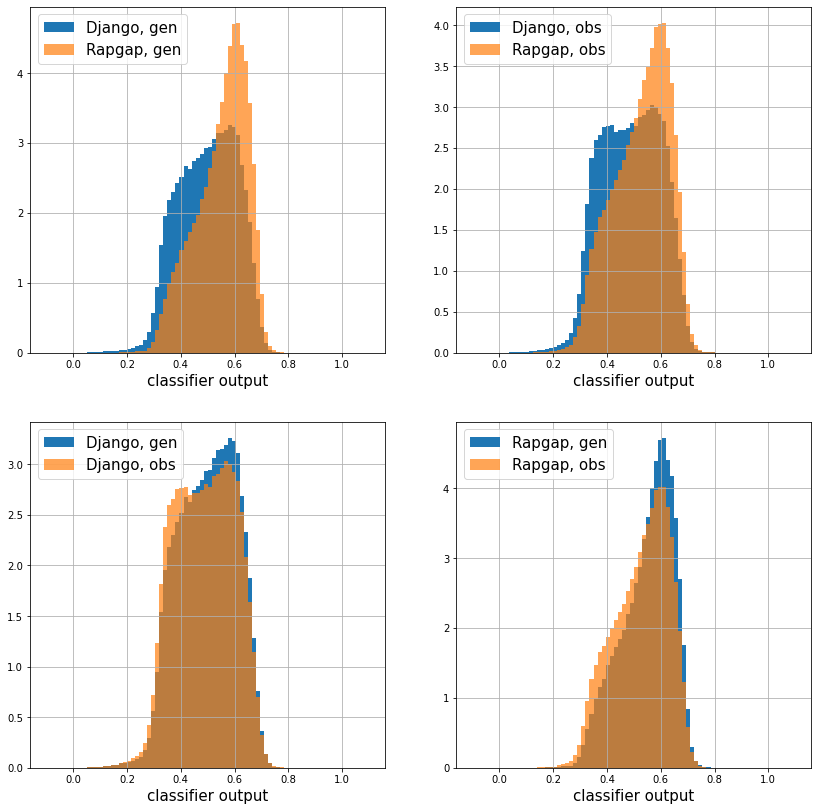

In [84]:
fig,ax = plt.subplots(2,2,figsize=(14,14))

ax[0][0].hist( classifier_output_django_gen, density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
ax[0][0].hist( classifier_output_rapgap_gen, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen', alpha=0.7)
      
ax[0][1].hist( classifier_output_django_obs, density=True, bins=80, range=[-0.1,1.1], label='Django, obs' )
ax[0][1].hist( classifier_output_rapgap_obs, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7)

ax[1][0].hist( classifier_output_django_gen, density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
ax[1][0].hist( classifier_output_django_obs, density=True, bins=80, range=[-0.1,1.1], label='Django, obs', alpha=0.7 )


ax[1][1].hist( classifier_output_rapgap_gen, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen' )
ax[1][1].hist( classifier_output_rapgap_obs, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7 )




ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()



hfontsize=15

ax[0][0].set_xlabel('classifier output', fontsize=hfontsize)
ax[1][0].set_xlabel('classifier output', fontsize=hfontsize)
ax[0][1].set_xlabel('classifier output', fontsize=hfontsize)
ax[1][1].set_xlabel('classifier output', fontsize=hfontsize)



ax[0][0].legend( loc='best', fontsize=hfontsize)
ax[1][0].legend( loc='best', fontsize=hfontsize)
ax[0][1].legend( loc='best', fontsize=hfontsize)
ax[1][1].legend( loc='best', fontsize=hfontsize)


plt.show()

In [89]:
overall_preds = GR.predict( [X_gen_and_obs_test, Y_gen_and_obs_test], batch_size=2048 )

193/193 [==============================] - 0s 881us/step


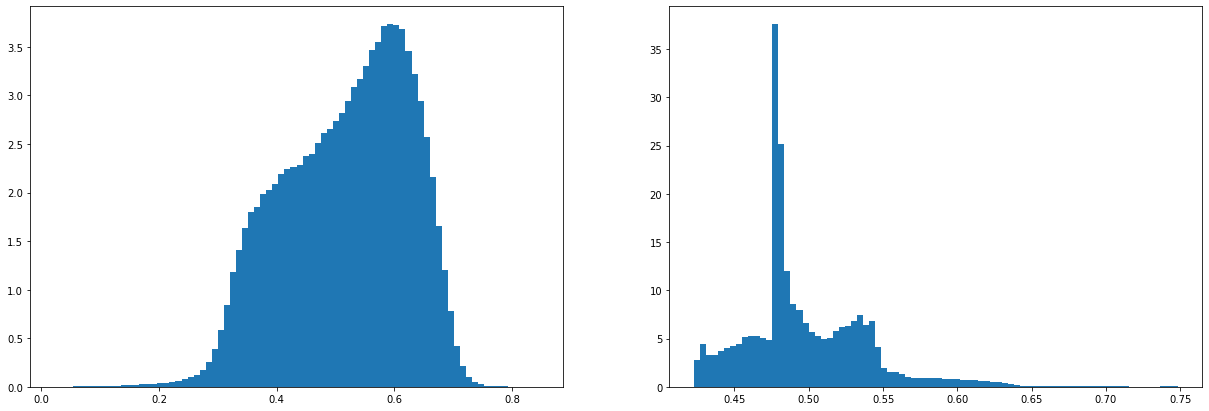

In [90]:
fig,ax = plt.subplots(1,2,figsize=(21,7))

ax[0].hist( overall_preds[0], bins=80, density=True )

ax[1].hist( overall_preds[1], bins=80, density=True )

plt.show()

## Inspect the adversary NN function and compare to what is expected, derived from histograms

In [92]:
%%time

#-- arrgh.  Can't figure out how to do this in the numpy way that doesn't take a ton of memory...  
#   Do it the slow way.

preds_clf_r_gen = np.empty([0])
preds_clf_r_obs = np.empty([0])
preds_clf_d_gen = np.empty([0])
preds_clf_d_obs = np.empty([0])

for i in range(len(overall_preds[0])):
    if i%100000 == 0 :
        print(i)
    if Y_gen_and_obs_test[i] == 1 and Z_gen_and_obs_test[i] == 0 :
        preds_clf_r_gen = np.append( preds_clf_r_gen, overall_preds[0][i] )
    if Y_gen_and_obs_test[i] == 1 and Z_gen_and_obs_test[i] == 1 :
        preds_clf_r_obs = np.append( preds_clf_r_obs, overall_preds[0][i] )
    if Y_gen_and_obs_test[i] == 0 and Z_gen_and_obs_test[i] == 0 :
        preds_clf_d_gen = np.append( preds_clf_d_gen, overall_preds[0][i] )
    if Y_gen_and_obs_test[i] == 0 and Z_gen_and_obs_test[i] == 1 :
        preds_clf_d_obs = np.append( preds_clf_d_obs, overall_preds[0][i] )

0
100000
200000
300000
CPU times: user 7.48 s, sys: 309 ms, total: 7.79 s
Wall time: 7.52 s


/tmp/ipykernel_2982134/1559808855.py:38: RuntimeWarning: invalid value encountered in double_scalars
  herr_r[i] = np.sqrt( hprobr[i]*(1-hprobr[i])/(o+g) )
/tmp/ipykernel_2982134/1559808855.py:42: RuntimeWarning: invalid value encountered in double_scalars
  herr_d[i] = np.sqrt( hprobd[i]*(1-hprobd[i])/(o+g) )


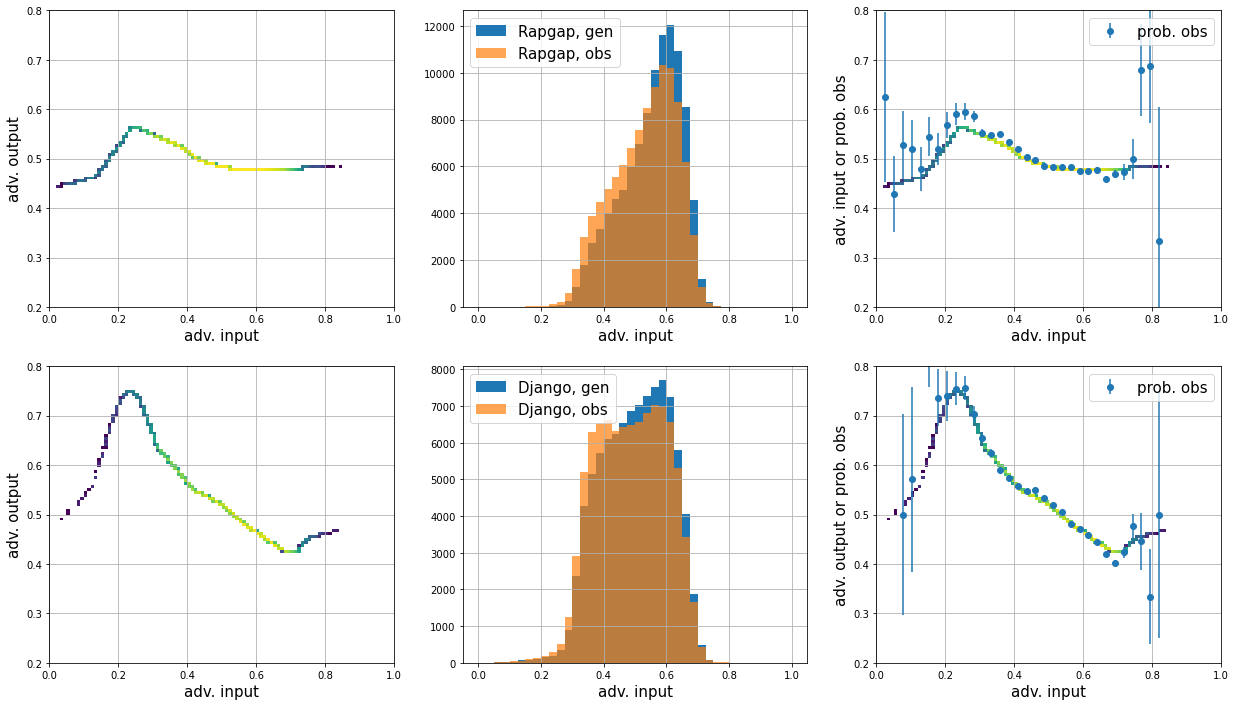

In [94]:
fig,ax = plt.subplots(2,3,figsize=(21,12))

hbins=40

hymin=0.20
hymax=0.80

ax[0][0].hist2d( overall_preds[0][Y_gen_and_obs_test==0], 
                overall_preds[1][Y_gen_and_obs_test==0], 
                bins=100, norm=mpl.colors.LogNorm(), range=([0,1],[hymin,hymax]) )

ax[1][0].hist2d( overall_preds[0][Y_gen_and_obs_test==1], 
                overall_preds[1][Y_gen_and_obs_test==1], 
                bins=100, norm=mpl.colors.LogNorm(), range=([0,1],[hymin,hymax]) )



hrg = ax[0][1].hist( preds_clf_r_gen, bins=hbins, range=[0,1], label='Rapgap, gen' )
hro = ax[0][1].hist( preds_clf_r_obs, bins=hbins, range=[0,1], label='Rapgap, obs', alpha=0.7 )

hdg = ax[1][1].hist( preds_clf_d_gen, bins=hbins, range=[0,1], label='Django, gen'  )
hdo = ax[1][1].hist( preds_clf_d_obs, bins=hbins, range=[0,1], label='Django, obs', alpha=0.7 )





hprobr = np.zeros(len(hro[0]) )
hprobd = np.zeros(len(hdo[0]) )
herr_r = np.zeros(len(hro[0]) )
herr_d = np.zeros(len(hdo[0]) )

paxis = np.linspace( 0, 1, len(hro[0]) )
for i in range(len(hro[0])):
    o = hro[0][i]
    g = hrg[0][i]
    if o != 0 and g != 0 : hprobr[i] = o / (o+g)
    herr_r[i] = np.sqrt( hprobr[i]*(1-hprobr[i])/(o+g) )
    o = hdo[0][i]
    g = hdg[0][i]
    if o != 0 and g != 0 : hprobd[i] = o / (o+g)
    herr_d[i] = np.sqrt( hprobd[i]*(1-hprobd[i])/(o+g) )

 



ax[0][2].hist2d( overall_preds[0][Y_gen_and_obs_test==0], 
                overall_preds[1][Y_gen_and_obs_test==0], 
                bins=100, norm=mpl.colors.LogNorm(), range=([0,1],[hymin,hymax]),
               label='adv. output')

ax[0][2].errorbar( paxis, hprobd, yerr=herr_d, fmt='o', label='prob. obs' ) 




ax[1][2].hist2d( overall_preds[0][Y_gen_and_obs_test==1], 
                overall_preds[1][Y_gen_and_obs_test==1], 
                bins=100, norm=mpl.colors.LogNorm(), range=([0,1],[hymin,hymax]) )

ax[1][2].errorbar( paxis, hprobr, yerr=herr_r, fmt='o', label='prob. obs' ) 



ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()


ax[1][0].grid()
ax[1][1].grid()
ax[1][2].grid()




fontsize=15

ax[0][0].set_xlabel('adv. input', fontsize=hfontsize)
ax[0][0].set_ylabel('adv. output', fontsize=hfontsize)

ax[1][0].set_xlabel('adv. input', fontsize=hfontsize)
ax[1][0].set_ylabel('adv. output', fontsize=hfontsize)

ax[0][1].set_xlabel('adv. input', fontsize=hfontsize)
ax[0][2].set_xlabel('adv. input', fontsize=hfontsize)
ax[1][1].set_xlabel('adv. input', fontsize=hfontsize)
ax[1][2].set_xlabel('adv. input', fontsize=hfontsize)

ax[0][2].set_ylabel('adv. input or prob. obs', fontsize=hfontsize)
ax[1][2].set_ylabel('adv. output or prob. obs', fontsize=hfontsize)



ax[0][1].legend( loc='best', fontsize=hfontsize)
ax[1][1].legend( loc='best', fontsize=hfontsize)

ax[0][2].legend( loc='best', fontsize=hfontsize)
ax[1][2].legend( loc='best', fontsize=hfontsize)

    
plt.show()

## Test with Lambda = 0 to turn off adversary

In [95]:
n_hidden_inv = 2; n_hidden_inv_R = 5
n_nodes_inv = 50; n_nodes_inv_R = 50
hp_lambda0 = 0.

inputs = Input(shape=(9,))
inputs_label = Input(shape=(1,))

Dx_lam0 = Dense(n_nodes_inv, activation="relu")(inputs)
for i in range(n_hidden_inv -1):
    Dx_lam0 = Dense(n_nodes_inv, activation='relu')(Dx_lam0)
Dx_lam0 = Dense(1, activation="sigmoid", name="Clf")(Dx_lam0)
inv_model_lam0 = Model(inputs=inputs, outputs=Dx_lam0)

GRx_lam0 = GradReverse()(Dx_lam0)
GRx_con_lam0 = tf.keras.layers.concatenate([GRx_lam0,inputs_label])
Rx_lam0 = Dense(n_nodes_inv_R, activation="relu")(GRx_con_lam0)
for i in range(n_hidden_inv_R -1):
    Rx_lam0 = Dense(n_nodes_inv_R, activation='relu')(Rx_lam0)

Rx_lam0 = Dense(1, activation="sigmoid", name="Adv")(Rx_lam0)
GR_lam0 = Model(inputs=[inputs,inputs_label], outputs=[Dx_lam0, Rx_lam0])

GR_lam0.compile(loss=["binary_crossentropy", "binary_crossentropy"], loss_weights=[1,hp_lambda0], optimizer="adam") #rmsprop

In [96]:
GRhist_lam0 = GR_lam0.fit(x=[X_gen_and_obs_train, Y_gen_and_obs_train], 
                y=[Y_gen_and_obs_train, Z_gen_and_obs_train], 
                validation_data=([X_gen_and_obs_test, Y_gen_and_obs_test],[Y_gen_and_obs_test, Z_gen_and_obs_test]),
                epochs=2000, batch_size=2048, verbose = 1, callbacks=[earlystopping] )

Epoch 1/2000
193/193 [==============================] - 3s 7ms/step - loss: 0.6769 - Clf_loss: 0.6769 - Adv_loss: 0.6933 - val_loss: 0.6721 - val_Clf_loss: 0.6721 - val_Adv_loss: 0.6932
Epoch 2/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6716 - Clf_loss: 0.6716 - Adv_loss: 0.6933 - val_loss: 0.6699 - val_Clf_loss: 0.6699 - val_Adv_loss: 0.6932
Epoch 3/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6702 - Clf_loss: 0.6702 - Adv_loss: 0.6933 - val_loss: 0.6695 - val_Clf_loss: 0.6695 - val_Adv_loss: 0.6932
Epoch 4/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6696 - Clf_loss: 0.6696 - Adv_loss: 0.6933 - val_loss: 0.6687 - val_Clf_loss: 0.6687 - val_Adv_loss: 0.6932
Epoch 5/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6691 - Clf_loss: 0.6691 - Adv_loss: 0.6933 - val_loss: 0.6682 - val_Clf_loss: 0.6682 - val_Adv_loss: 0.6932
Epoch 6/2000
193/193 [==============================] - 1s 6ms/step - 

Epoch 45/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6622 - Clf_loss: 0.6622 - Adv_loss: 0.6933 - val_loss: 0.6622 - val_Clf_loss: 0.6622 - val_Adv_loss: 0.6932
Epoch 46/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6621 - Clf_loss: 0.6621 - Adv_loss: 0.6933 - val_loss: 0.6619 - val_Clf_loss: 0.6619 - val_Adv_loss: 0.6932
Epoch 47/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6620 - Clf_loss: 0.6620 - Adv_loss: 0.6933 - val_loss: 0.6622 - val_Clf_loss: 0.6622 - val_Adv_loss: 0.6932
Epoch 48/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6620 - Clf_loss: 0.6620 - Adv_loss: 0.6933 - val_loss: 0.6621 - val_Clf_loss: 0.6621 - val_Adv_loss: 0.6932
Epoch 49/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6620 - Clf_loss: 0.6620 - Adv_loss: 0.6933 - val_loss: 0.6622 - val_Clf_loss: 0.6622 - val_Adv_loss: 0.6932
Epoch 50/2000
193/193 [==============================] - 1s 6ms/s

Epoch 89/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6608 - Clf_loss: 0.6608 - Adv_loss: 0.6932 - val_loss: 0.6618 - val_Clf_loss: 0.6618 - val_Adv_loss: 0.6932
Epoch 90/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6609 - Clf_loss: 0.6609 - Adv_loss: 0.6932 - val_loss: 0.6612 - val_Clf_loss: 0.6612 - val_Adv_loss: 0.6932
Epoch 91/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6607 - Clf_loss: 0.6607 - Adv_loss: 0.6932 - val_loss: 0.6616 - val_Clf_loss: 0.6616 - val_Adv_loss: 0.6932
Epoch 92/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6607 - Clf_loss: 0.6607 - Adv_loss: 0.6932 - val_loss: 0.6616 - val_Clf_loss: 0.6616 - val_Adv_loss: 0.6932
Epoch 93/2000
193/193 [==============================] - 1s 6ms/step - loss: 0.6607 - Clf_loss: 0.6607 - Adv_loss: 0.6932 - val_loss: 0.6614 - val_Clf_loss: 0.6614 - val_Adv_loss: 0.6932
Epoch 94/2000
193/193 [==============================] - 1s 6ms/s

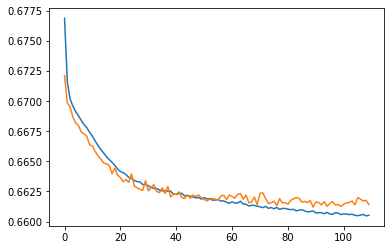

In [97]:
plt.plot(GRhist_lam0.history['loss'])
plt.plot(GRhist_lam0.history['val_loss'])

In [98]:

classifier_output_django_gen_lam0 = inv_model_lam0.predict( Xs_gen_d, batch_size=2048 )
classifier_output_django_obs_lam0 = inv_model_lam0.predict( Xs_obs_d, batch_size=2048 )
classifier_output_rapgap_gen_lam0 = inv_model_lam0.predict( Xs_gen_r, batch_size=2048 )
classifier_output_rapgap_obs_lam0 = inv_model_lam0.predict( Xs_obs_r, batch_size=2048 )

101/101 [==============================] - 0s 518us/step


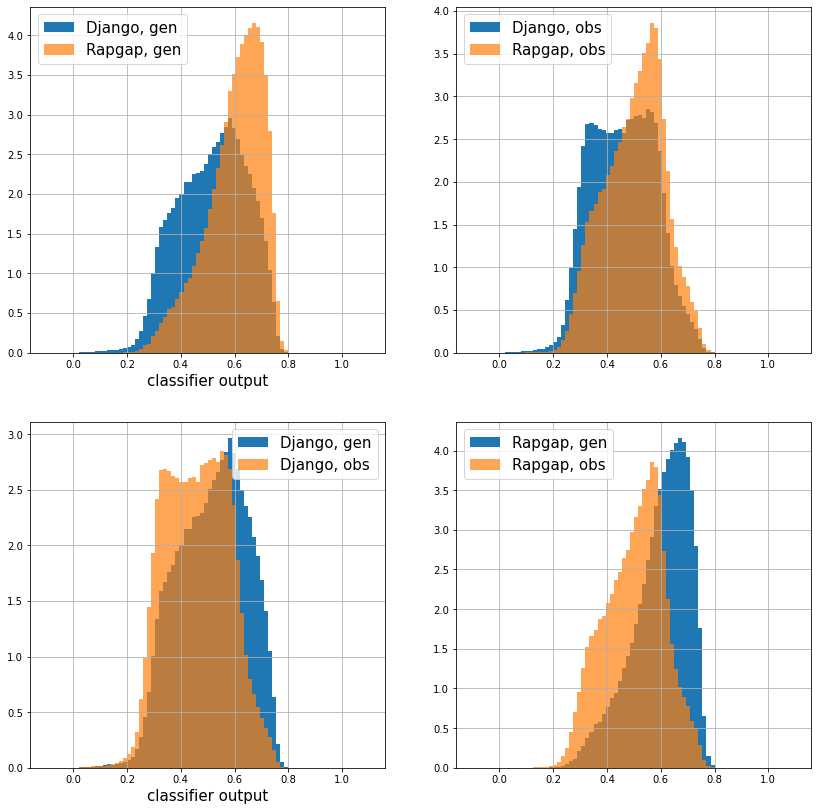

In [99]:
fig,ax = plt.subplots(2,2,figsize=(14,14))

ax[0][0].hist( classifier_output_django_gen_lam0, density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
ax[0][0].hist( classifier_output_rapgap_gen_lam0, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen', alpha=0.7)
      
ax[0][1].hist( classifier_output_django_obs_lam0, density=True, bins=80, range=[-0.1,1.1], label='Django, obs' )
ax[0][1].hist( classifier_output_rapgap_obs_lam0, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7)

ax[1][0].hist( classifier_output_django_gen_lam0, density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
ax[1][0].hist( classifier_output_django_obs_lam0, density=True, bins=80, range=[-0.1,1.1], label='Django, obs', alpha=0.7 )


ax[1][1].hist( classifier_output_rapgap_gen_lam0, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen' )
ax[1][1].hist( classifier_output_rapgap_obs_lam0, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7 )




ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()



hfontsize=15

ax[0][0].set_xlabel('classifier output', fontsize=hfontsize)
ax[1][0].set_xlabel('classifier output', fontsize=hfontsize)




ax[0][0].legend( loc='best', fontsize=hfontsize)
ax[1][0].legend( loc='best', fontsize=hfontsize)
ax[0][1].legend( loc='best', fontsize=hfontsize)
ax[1][1].legend( loc='best', fontsize=hfontsize)


plt.show()

## Sanity check :  Train a simple classifier with the same input as above (mix of particle and detector level events).

In [100]:
model_sc = Sequential()
model_sc.add(Dense(50, input_dim=9, activation='relu')) 
model_sc.add(Dense(50, activation='relu'))
model_sc.add(Dense(1, activation='sigmoid'))
model_sc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
hist_sc = model_sc.fit(X_gen_and_obs_train, Y_gen_and_obs_train, validation_data=(X_gen_and_obs_test, Y_gen_and_obs_test), epochs=2000, batch_size=4096,
                 verbose = 1, callbacks=[earlystopping] )

Epoch 1/2000
97/97 [==============================] - 1s 4ms/step - loss: 0.6864 - accuracy: 0.5672 - val_loss: 0.6767 - val_accuracy: 0.5822
Epoch 2/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5830 - val_loss: 0.6731 - val_accuracy: 0.5864
Epoch 3/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.5872 - val_loss: 0.6713 - val_accuracy: 0.5897
Epoch 4/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.5902 - val_loss: 0.6702 - val_accuracy: 0.5919
Epoch 5/2000
97/97 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.5908 - val_loss: 0.6696 - val_accuracy: 0.5926
Epoch 6/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.5921 - val_loss: 0.6692 - val_accuracy: 0.5942
Epoch 7/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.5918 - val_loss: 0.6687 - val_accuracy: 0.5945
Epoch 

97/97 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6034 - val_loss: 0.6631 - val_accuracy: 0.6021
Epoch 59/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.6032 - val_loss: 0.6625 - val_accuracy: 0.6039
Epoch 60/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6032 - val_loss: 0.6634 - val_accuracy: 0.6018
Epoch 61/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6036 - val_loss: 0.6629 - val_accuracy: 0.6033
Epoch 62/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6035 - val_loss: 0.6628 - val_accuracy: 0.6033
Epoch 63/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6033 - val_loss: 0.6627 - val_accuracy: 0.6035
Epoch 64/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6038 - val_loss: 0.6630 - val_accuracy: 0.6031
Epoch 65/2000

97/97 [==============================] - 0s 4ms/step - loss: 0.6610 - accuracy: 0.6060 - val_loss: 0.6619 - val_accuracy: 0.6038
Epoch 116/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6611 - accuracy: 0.6059 - val_loss: 0.6619 - val_accuracy: 0.6041
Epoch 117/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6610 - accuracy: 0.6061 - val_loss: 0.6618 - val_accuracy: 0.6041
Epoch 118/2000
97/97 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6065 - val_loss: 0.6622 - val_accuracy: 0.6040
Epoch 119/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6610 - accuracy: 0.6059 - val_loss: 0.6618 - val_accuracy: 0.6038
Epoch 120/2000
97/97 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6060 - val_loss: 0.6620 - val_accuracy: 0.6035
Epoch 121/2000
97/97 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6060 - val_loss: 0.6616 - val_accuracy: 0.6041
Epoch 1

Epoch 172/2000
97/97 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6070 - val_loss: 0.6620 - val_accuracy: 0.6046
Epoch 173/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.6073 - val_loss: 0.6618 - val_accuracy: 0.6040
Epoch 174/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.6072 - val_loss: 0.6616 - val_accuracy: 0.6042
Epoch 175/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.6069 - val_loss: 0.6616 - val_accuracy: 0.6042
Epoch 176/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.6074 - val_loss: 0.6622 - val_accuracy: 0.6034
Epoch 177/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.6069 - val_loss: 0.6615 - val_accuracy: 0.6046
Epoch 178/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.6075 - val_loss: 0.6623 - val_accuracy:

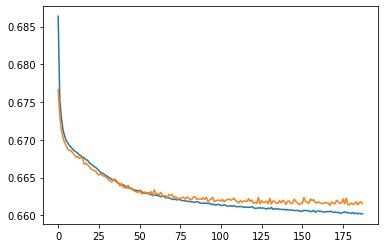

In [102]:
plt.plot(hist_sc.history['loss'])
plt.plot(hist_sc.history['val_loss'])

In [103]:
classifier_output_django_gen_sc = model_sc.predict( Xs_gen_d, batch_size=2048 )
classifier_output_django_obs_sc = model_sc.predict( Xs_obs_d, batch_size=2048 )
classifier_output_rapgap_gen_sc = model_sc.predict( Xs_gen_r, batch_size=2048 )
classifier_output_rapgap_obs_sc = model_sc.predict( Xs_obs_r, batch_size=2048 )

101/101 [==============================] - 0s 543us/step


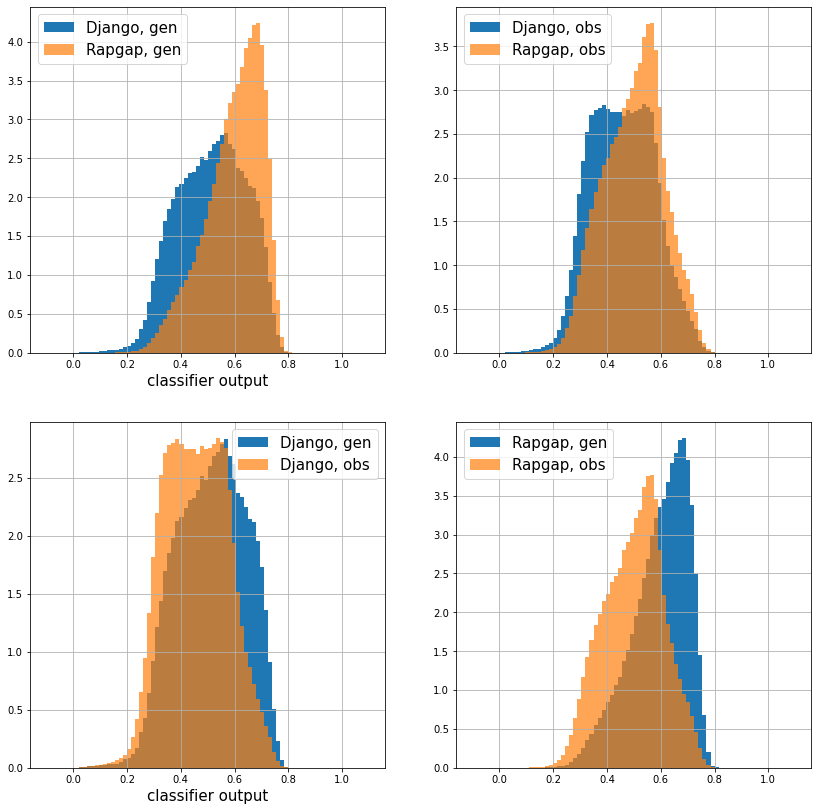

In [104]:
fig,ax = plt.subplots(2,2,figsize=(14,14))

ax[0][0].hist( classifier_output_django_gen_sc, density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
ax[0][0].hist( classifier_output_rapgap_gen_sc, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen', alpha=0.7)
    
ax[0][1].hist( classifier_output_django_obs_sc, density=True, bins=80, range=[-0.1,1.1], label='Django, obs' )
ax[0][1].hist( classifier_output_rapgap_obs_sc, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7)

ax[1][0].hist( classifier_output_django_gen_sc, density=True, bins=80, range=[-0.1,1.1], label='Django, gen' )
ax[1][0].hist( classifier_output_django_obs_sc, density=True, bins=80, range=[-0.1,1.1], label='Django, obs', alpha=0.7 )

ax[1][1].hist( classifier_output_rapgap_gen_sc, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, gen' )
ax[1][1].hist( classifier_output_rapgap_obs_sc, density=True, bins=80, range=[-0.1,1.1], label='Rapgap, obs', alpha=0.7 )




ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()



hfontsize=15

ax[0][0].set_xlabel('classifier output', fontsize=hfontsize)
ax[1][0].set_xlabel('classifier output', fontsize=hfontsize)




ax[0][0].legend( loc='best', fontsize=hfontsize)
ax[1][0].legend( loc='best', fontsize=hfontsize)
ax[0][1].legend( loc='best', fontsize=hfontsize)
ax[1][1].legend( loc='best', fontsize=hfontsize)


plt.show()

## Try and set up a classifier that takes a single input, which is the output of the Django vs Rapgap classifier

In [105]:
model_adv_standalone = Sequential()
model_adv_standalone.add(Dense(50, input_dim=1, activation='relu')) 
model_adv_standalone.add(Dense(50, activation='relu'))
model_adv_standalone.add(Dense(50, activation='relu'))
model_adv_standalone.add(Dense(50, activation='relu'))
model_adv_standalone.add(Dense(50, activation='relu'))
model_adv_standalone.add(Dense(1, activation='sigmoid'))
model_adv_standalone.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
X_adv_standalone_train = model_sc.predict( X_gen_and_obs_train, batch_size=2048 )
X_adv_standalone_test = model_sc.predict( X_gen_and_obs_test, batch_size=2048 )

193/193 [==============================] - 0s 549us/step


In [107]:
hist_adv_standalone = model_adv_standalone.fit(X_adv_standalone_train, Z_gen_and_obs_train, 
                                               validation_data=(X_adv_standalone_test, Z_gen_and_obs_test),
                                               epochs=2000, batch_size=4096,
                                               verbose = 1, callbacks=[earlystopping] )

Epoch 1/2000
97/97 [==============================] - 2s 5ms/step - loss: 0.6532 - accuracy: 0.6094 - val_loss: 0.6362 - val_accuracy: 0.6392
Epoch 2/2000
97/97 [==============================] - 0s 5ms/step - loss: 0.6378 - accuracy: 0.6371 - val_loss: 0.6359 - val_accuracy: 0.6392
Epoch 3/2000
97/97 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.6371 - val_loss: 0.6362 - val_accuracy: 0.6369
Epoch 4/2000
97/97 [==============================] - 0s 5ms/step - loss: 0.6376 - accuracy: 0.6374 - val_loss: 0.6366 - val_accuracy: 0.6387
Epoch 5/2000
97/97 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.6375 - val_loss: 0.6356 - val_accuracy: 0.6391
Epoch 6/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.6379 - val_loss: 0.6362 - val_accuracy: 0.6384
Epoch 7/2000
97/97 [==============================] - 0s 5ms/step - loss: 0.6373 - accuracy: 0.6374 - val_loss: 0.6353 - val_accuracy: 0.6393
Epoch 

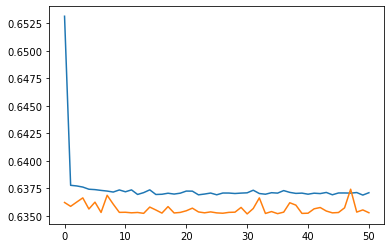

In [108]:
plt.plot(hist_adv_standalone.history['loss'])
plt.plot(hist_adv_standalone.history['val_loss'])

In [109]:
adv_pred = model_adv_standalone.predict( X_adv_standalone_test, batch_size=2048 )

193/193 [==============================] - 0s 645us/step


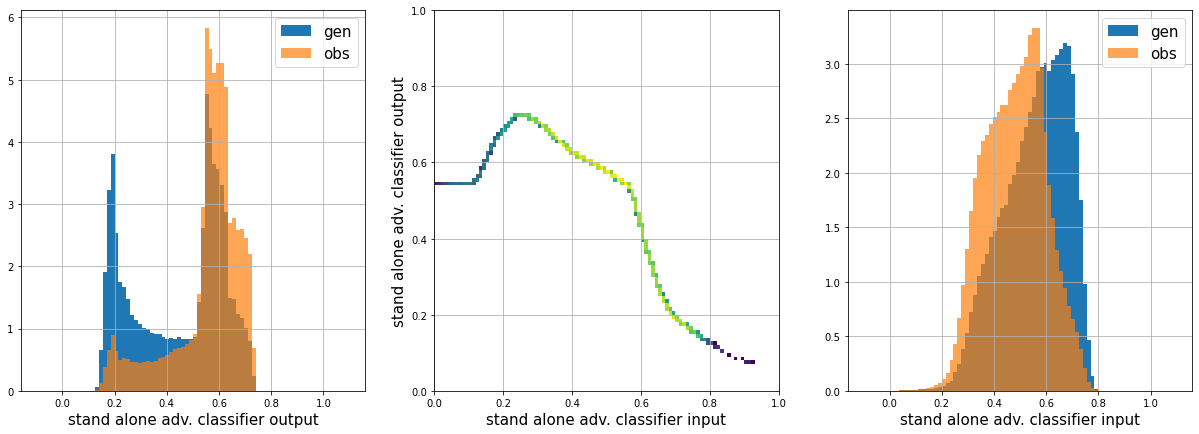

In [110]:
fig,ax = plt.subplots(1,3,figsize=(21,7))

ax[0].hist( adv_pred[Z_gen_and_obs_test==0], density=True, bins=80, range=[-0.1,1.1], label='gen' )
ax[0].hist( adv_pred[Z_gen_and_obs_test==1], density=True, bins=80, range=[-0.1,1.1], label='obs', alpha=0.7)

ax[1].hist2d( X_adv_standalone_test[:,0], adv_pred[:,0], bins=100, range=([0,1],[0,1]), norm=mpl.colors.LogNorm()  )

ax[2].hist( X_adv_standalone_train[Z_gen_and_obs_train==0], bins=80, range=[-0.1,1.1], label='gen', density=True )
ax[2].hist( X_adv_standalone_train[Z_gen_and_obs_train==1], bins=80, range=[-0.1,1.1], label='obs', density=True, alpha=0.7 )

ax[0].grid()
ax[1].grid()
ax[2].grid()



hfontsize=15

ax[0].set_xlabel('stand alone adv. classifier output', fontsize=hfontsize)

ax[1].set_xlabel('stand alone adv. classifier input', fontsize=hfontsize)
ax[1].set_ylabel('stand alone adv. classifier output', fontsize=hfontsize)

ax[2].set_xlabel('stand alone adv. classifier input', fontsize=hfontsize)


ax[0].legend( loc='best', fontsize=hfontsize)
ax[2].legend( loc='best', fontsize=hfontsize)


plt.show()

## Now try training the adversary part in the same way, providing the first NN output and the Y labels for the first NN as inputs to the adversary network

In [111]:
np.shape(X_gen_and_obs_train)

(394620, 9)

In [112]:
X_adv_standalone2_train = np.concatenate([X_adv_standalone_train, Y_gen_and_obs_train],axis=1 )
X_adv_standalone2_test = np.concatenate([X_adv_standalone_test, Y_gen_and_obs_test],axis=1 )

In [113]:
X_adv_standalone2_train

array([[0.56164575, 0.        ],
       [0.39372456, 0.        ],
       [0.6485945 , 0.        ],
       ...,
       [0.71743506, 1.        ],
       [0.28511053, 0.        ],
       [0.38879332, 1.        ]])

In [114]:
for i in range(20):
    print("  %.4f  %.1f" % (X_adv_standalone2_train[i,0], X_adv_standalone2_train[i,1]))

  0.5616  0.0
  0.3937  0.0
  0.6486  0.0
  0.7195  0.0
  0.6407  1.0
  0.3677  0.0
  0.5517  1.0
  0.4281  0.0
  0.5256  1.0
  0.7064  1.0
  0.6870  1.0
  0.5445  1.0
  0.5102  0.0
  0.7235  1.0
  0.4861  1.0
  0.6177  0.0
  0.5571  0.0
  0.4887  0.0
  0.3810  0.0
  0.4989  1.0


In [115]:
model_adv_standalone2 = Sequential()
model_adv_standalone2.add(Dense(50, input_dim=2, activation='relu')) 
model_adv_standalone2.add(Dense(50, activation='relu'))
model_adv_standalone2.add(Dense(50, activation='relu'))
model_adv_standalone2.add(Dense(50, activation='relu'))
model_adv_standalone2.add(Dense(50, activation='relu'))
model_adv_standalone2.add(Dense(1, activation='sigmoid'))
model_adv_standalone2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
hist_adv_standalone2 = model_adv_standalone2.fit(X_adv_standalone2_train, Z_gen_and_obs_train, 
                                               validation_data=(X_adv_standalone2_test, Z_gen_and_obs_test),
                                               epochs=2000, batch_size=4096,
                                               verbose = 1, callbacks=[earlystopping] )

Epoch 1/2000
97/97 [==============================] - 2s 5ms/step - loss: 0.6524 - accuracy: 0.6105 - val_loss: 0.6314 - val_accuracy: 0.6358
Epoch 2/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6316 - accuracy: 0.6373 - val_loss: 0.6292 - val_accuracy: 0.6395
Epoch 3/2000
97/97 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.6375 - val_loss: 0.6297 - val_accuracy: 0.6382
Epoch 4/2000
97/97 [==============================] - 0s 5ms/step - loss: 0.6310 - accuracy: 0.6378 - val_loss: 0.6292 - val_accuracy: 0.6397
Epoch 5/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6306 - accuracy: 0.6383 - val_loss: 0.6288 - val_accuracy: 0.6399
Epoch 6/2000
97/97 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.6378 - val_loss: 0.6296 - val_accuracy: 0.6387
Epoch 7/2000
97/97 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.6382 - val_loss: 0.6309 - val_accuracy: 0.6377
Epoch 

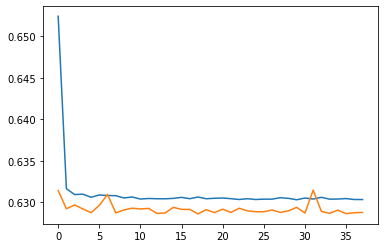

In [117]:
plt.plot(hist_adv_standalone2.history['loss'])
plt.plot(hist_adv_standalone2.history['val_loss'])

In [118]:
adv2_pred = model_adv_standalone2.predict( X_adv_standalone2_test, batch_size=2048 )

193/193 [==============================] - 0s 649us/step


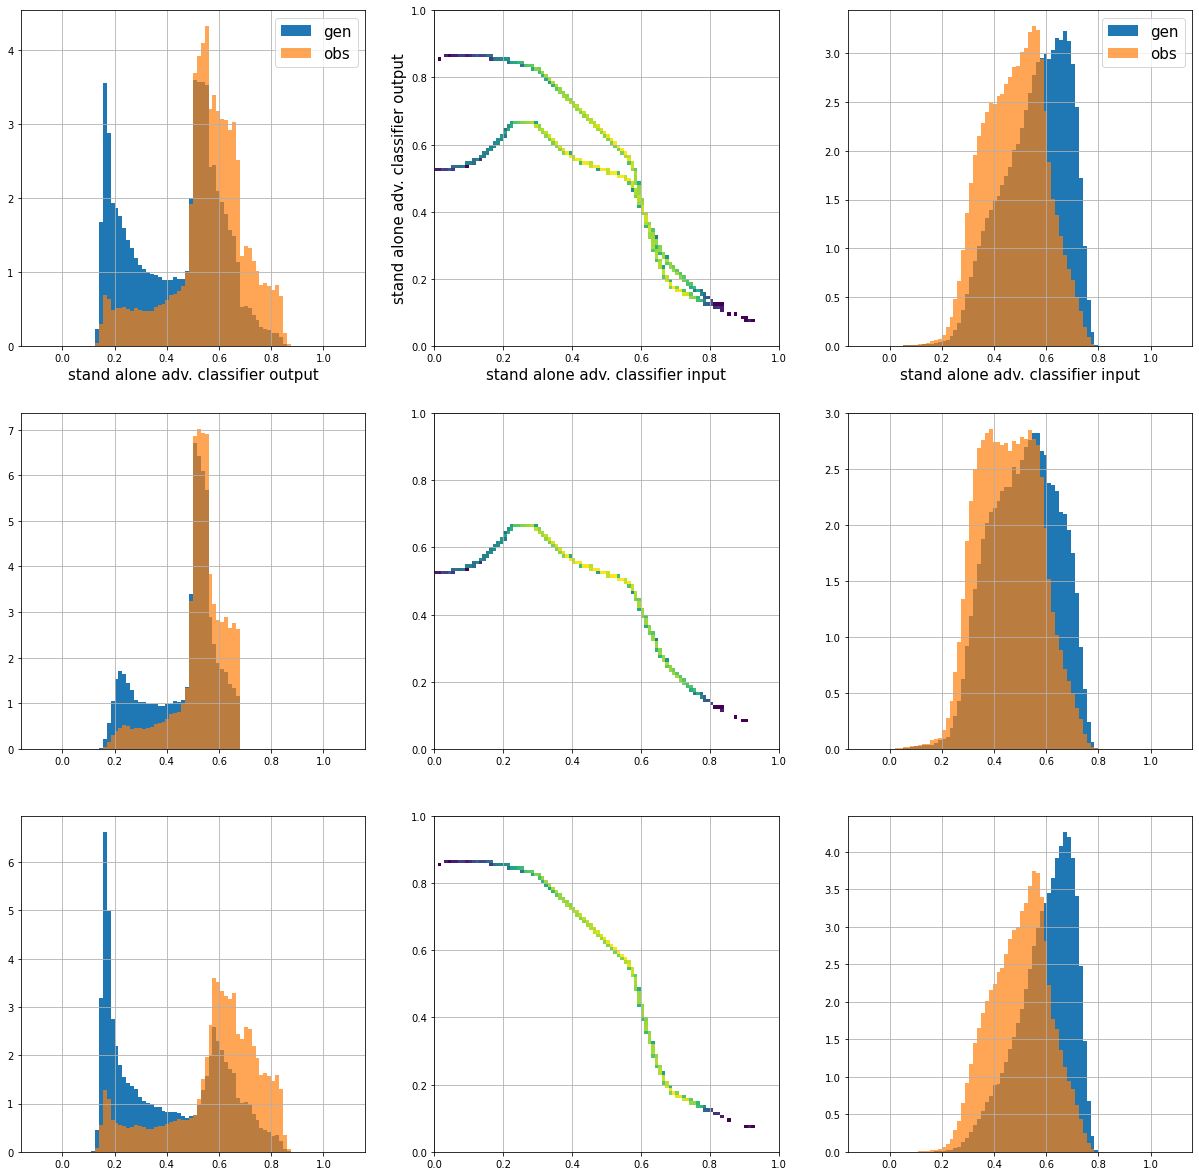

In [119]:
fig,ax = plt.subplots(3,3,figsize=(21,21))


#-----------

ax[0][0].hist( adv2_pred[Z_gen_and_obs_test==0], density=True, bins=80, range=[-0.1,1.1], label='gen' )
ax[0][0].hist( adv2_pred[Z_gen_and_obs_test==1], density=True, bins=80, range=[-0.1,1.1], label='obs', alpha=0.7)

ax[0][1].hist2d( X_adv_standalone2_test[:,0], adv2_pred[:,0], bins=100, range=([0,1],[0,1]), norm=mpl.colors.LogNorm()  )

ax[0][2].hist( X_adv_standalone2_test[Z_gen_and_obs_test==0][:,0], bins=80, range=[-0.1,1.1], label='gen', density=True )
ax[0][2].hist( X_adv_standalone2_test[Z_gen_and_obs_test==1][:,0], bins=80, range=[-0.1,1.1], label='obs', density=True, alpha=0.7 )

ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()

#-----------


ax[1][0].hist( adv2_pred[Z_gen_and_obs_test==0][X_adv_standalone2_test[Z_gen_and_obs_test==0,1]==0], density=True, bins=80, range=[-0.1,1.1], label='gen' )
ax[1][0].hist( adv2_pred[Z_gen_and_obs_test==1][X_adv_standalone2_test[Z_gen_and_obs_test==1,1]==0], density=True, bins=80, range=[-0.1,1.1], label='obs', alpha=0.7)

ax[1][1].hist2d( X_adv_standalone2_test[X_adv_standalone2_test[:,1]==0,0], adv2_pred[X_adv_standalone2_test[:,1]==0,0], bins=100, range=([0,1],[0,1]), norm=mpl.colors.LogNorm()  )

ax[1][2].hist( X_adv_standalone2_test[Z_gen_and_obs_test==0][X_adv_standalone2_test[Z_gen_and_obs_test==0,1]==0][:,0], bins=80, range=[-0.1,1.1], label='gen', density=True )
ax[1][2].hist( X_adv_standalone2_test[Z_gen_and_obs_test==1][X_adv_standalone2_test[Z_gen_and_obs_test==1,1]==0][:,0], bins=80, range=[-0.1,1.1], label='obs', density=True, alpha=0.7 )

ax[1][0].grid()
ax[1][1].grid()
ax[1][2].grid()

#-----------

ax[2][0].hist( adv2_pred[Z_gen_and_obs_test==0][X_adv_standalone2_test[Z_gen_and_obs_test==0,1]==1], density=True, bins=80, range=[-0.1,1.1], label='gen' )
ax[2][0].hist( adv2_pred[Z_gen_and_obs_test==1][X_adv_standalone2_test[Z_gen_and_obs_test==1,1]==1], density=True, bins=80, range=[-0.1,1.1], label='obs', alpha=0.7)


ax[2][1].hist2d( X_adv_standalone2_test[X_adv_standalone2_test[:,1]==1,0], adv2_pred[X_adv_standalone2_test[:,1]==1,0], bins=100, range=([0,1],[0,1]), norm=mpl.colors.LogNorm()  )

ax[2][2].hist( X_adv_standalone2_test[Z_gen_and_obs_test==0][X_adv_standalone2_test[Z_gen_and_obs_test==0,1]==1][:,0], bins=80, range=[-0.1,1.1], label='gen', density=True )
ax[2][2].hist( X_adv_standalone2_test[Z_gen_and_obs_test==1][X_adv_standalone2_test[Z_gen_and_obs_test==1,1]==1][:,0], bins=80, range=[-0.1,1.1], label='obs', density=True, alpha=0.7 )


ax[2][0].grid()
ax[2][1].grid()
ax[2][2].grid()


#-----------




hfontsize=15

ax[0][0].set_xlabel('stand alone adv. classifier output', fontsize=hfontsize)

ax[0][1].set_xlabel('stand alone adv. classifier input', fontsize=hfontsize)
ax[0][1].set_ylabel('stand alone adv. classifier output', fontsize=hfontsize)

ax[0][2].set_xlabel('stand alone adv. classifier input', fontsize=hfontsize)


ax[0][0].legend( loc='best', fontsize=hfontsize)
ax[0][2].legend( loc='best', fontsize=hfontsize)


plt.show()